# 1. Libraries

### A. Install required Packages

In [1]:
# !pip install matplotlib
# !pip install seaborn
# !pip install cmdstanpy
# !pip install arviz
# !pip install geopandas
# !pip install mapclassify
# !pip install cmdstanpy

# import cmdstanpy
# cmdstanpy.install_cmdstan()

### B. Import Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from cmdstanpy import CmdStanModel, cmdstan_path
import arviz as az
from pathlib import Path

from loadData import load_data
from imputeMissing import impute_value

import logging
logging.getLogger("cmdstanpy").setLevel(logging.INFO)

/media/brasammy/5B6DAD9B6A1F7E40/Projects/Thesis/Main/Final_work/thesis/myenv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Imputation Done!!!


# 2. Datasets

### A. Import the datasets

In [3]:
## Get file paths
csv_file = './Data/rstb20160308supp1.csv'

## Shapefile paths for districts
lib_1 = './gadm41_LBR_shp/gadm41_LBR_2.shp'
gin_1 = './gadm41_GIN_shp/gadm41_GIN_2.shp'
sle_1 = './gadm41_SLE_shp/gadm41_SLE_2.shp'

## shapefile paths for country
lib_0 = './gadm41_LBR_shp/gadm41_LBR_0.shp'
gin_0 = './gadm41_GIN_shp/gadm41_GIN_0.shp'
sle_0 = './gadm41_SLE_shp/gadm41_SLE_0.shp'

In [4]:
## Load data
ebola = load_data(csv_file) ## Ebola data

## District level shapefile
lib = load_data(lib_1, shapefile=True) ## Liberia
gin = load_data(gin_1, shapefile=True) ## Guinea
sle = load_data(sle_1, shapefile=True) ## Sierra Leone

## Country level shapefile
country_lib = load_data(lib_0, shapefile=True) ## Liberia
country_gin = load_data(gin_0, shapefile=True) ## guinea
country_sle = load_data(sle_0, shapefile=True) ## Sierra Leone

## concatenate the shape files
districts = pd.concat([lib, gin, sle], ignore_index=True)
country = pd.concat([country_lib, country_gin, country_sle], ignore_index=True)

Loading data from ./Data/rstb20160308supp1.csv...Please wait!
Done loading data from ./Data/rstb20160308supp1.csv!!!
 There are 33338 rows of observations.
 There are 16 columns
Loading data from ./gadm41_LBR_shp/gadm41_LBR_2.shp...Please wait!
Done loading data from ./gadm41_LBR_shp/gadm41_LBR_2.shp!!!
 There are 66 rows of observations.
 There are 14 columns
Loading data from ./gadm41_GIN_shp/gadm41_GIN_2.shp...Please wait!
Done loading data from ./gadm41_GIN_shp/gadm41_GIN_2.shp!!!
 There are 34 rows of observations.
 There are 14 columns
Loading data from ./gadm41_SLE_shp/gadm41_SLE_2.shp...Please wait!
Done loading data from ./gadm41_SLE_shp/gadm41_SLE_2.shp!!!
 There are 14 rows of observations.
 There are 14 columns
Loading data from ./gadm41_LBR_shp/gadm41_LBR_0.shp...Please wait!
Done loading data from ./gadm41_LBR_shp/gadm41_LBR_0.shp!!!
 There are 1 rows of observations.
 There are 3 columns
Loading data from ./gadm41_GIN_shp/gadm41_GIN_0.shp...Please wait!
Done loading data

# 3. Exploratory Data Analysis

## A. View the data by loading few values of each dataset

In [5]:
ebola.head(20)

Country EpiCaseDef FinalStatus   DateOnset DateOnsetInferred  DateReport  \
0   Guinea  confirmed        Dead  2015-02-06        2015-02-06  2015-02-06   
1   Guinea  confirmed        Dead  2015-03-02        2015-03-02  2015-03-07   
2   Guinea  confirmed        Dead  2015-03-15        2015-03-15  2015-03-17   
3   Guinea  confirmed        Dead  2014-06-06        2014-06-06  2014-06-09   
4   Guinea   probable        Dead  2014-02-27        2014-02-27  2014-02-27   
5   Guinea  confirmed       Alive  2015-06-26        2015-06-26  2015-06-29   
6   Guinea  confirmed        Dead  2014-11-17        2014-11-17  2014-11-23   
7   Guinea  confirmed       Alive  2014-08-29        2014-08-29  2014-08-30   
8   Guinea  confirmed        Dead  2014-08-16        2014-08-16  2014-08-18   
9   Guinea  confirmed        Dead  2014-05-19        2014-05-19  2014-05-22   
10  Guinea  confirmed       Alive  2014-10-13        2014-10-13  2014-10-14   
11  Guinea   probable        Dead  2014-08-05        2014-08-05  2014-08-25   
12  Guinea  confirmed       Alive  2014-11-13        2014-11-13  2014-11-16   
13  Guinea  confirmed        Dead  2014-10-11        2014-10-11  2014-10-14   
14  Guinea  confirmed       Alive  2014-11-12        2014-11-12  2014-11-14   
15  Guinea  confirmed       Alive  2014-12-16        2014-12-16  2014-12-20   
16  Guinea  confirmed        Dead  2014-09-08        2014-09-08  2014-09-20   
17  Guinea  confirmed       Alive  2015-04-06        2015-04-06  2015-04-11   
18  Guinea  confirmed        Dead  2014-08-10        2014-08-10  2014-08-17   
19  Guinea  confirmed        Dead  2015-02-04        2015-02-04  2015-02-07   

   DateOutcomeComp DateHospitalCurrentAdmit   Age CL_DistrictRes  \
0       2015-02-06                      NaN  45.0     FORECARIAH   
1       2015-03-07                      NaN  40.0        CONAKRY   
2       2015-03-18               2015-03-18   0.0     FORECARIAH   
3       2014-06-16               2014-06-09  30.0      GUECKEDOU   
4       2014-03-03                      NaN  46.0      GUECKEDOU   
5       2015-07-15               2015-06-30  45.0           BOKE   
6       2014-11-24                      NaN  13.0     N'ZEREKORE   
7       2014-09-13               2014-08-29   0.0      GUECKEDOU   
8       2014-08-20               2014-08-18  72.0        MACENTA   
9       2014-05-25               2014-05-22   6.0      GUECKEDOU   
10      2014-11-03               2014-10-13  14.0       KEROUANE   
11             NaN                      NaN  25.0     FORECARIAH   
12             NaN               2014-11-16  40.0        FARANAH   
13      2014-10-15                      NaN   NaN        MACENTA   
14      2014-11-30               2014-11-13  50.0     N'ZEREKORE   
15      2015-01-01               2014-12-20  45.0         KINDIA   
16      2014-09-22               2014-09-19  57.0        MACENTA   
17      2015-04-19               2015-04-13  35.0     FORECARIAH   
18      2014-08-24               2014-08-17  47.0        MACENTA   
19      2015-02-15               2015-02-07  22.0     FORECARIAH   

   HospitalizedEver      TreatmentCendreType TreatmentCentre  \
0                No         Not Hospitalised             NaN   
1                No         Not Hospitalised             NaN   
2               Yes                      ETU       Conakry 2   
3               Yes                      ETU     Gueckedou 1   
4               Yes          Unknown TC Type             NaN   
5               Yes                 Hospital        Kindia 1   
6               NaN  Hospitalisation Unknown             NaN   
7               Yes                      ETU     Gueckedou 1   
8               Yes                      ETU     Gueckedou 1   
9               Yes                      ETU     Gueckedou 1   
10              Yes                      ETU       Conakry 2   
11              NaN  Hospitalisation Unknown             NaN   
12              Yes                      ETU     Gueckedou 1   
13              Na

In [8]:
districts.head()

GID_2 GID_0  COUNTRY    GID_1 NAME_1 NL_NAME_1      NAME_2 VARNAME_2  \
0  LBR.1.1_1   LBR  Liberia  LBR.1_1   Bomi        NA        Klay        NA   
1  LBR.1.2_1   LBR  Liberia  LBR.1_1   Bomi        NA       Mecca        NA   
2  LBR.2.1_1   LBR  Liberia  LBR.2_1   Bong        NA      Fuamah        NA   
3  LBR.2.2_1   LBR  Liberia  LBR.2_1   Bong        NA  Jorquelleh        NA   
4  LBR.2.3_1   LBR  Liberia  LBR.2_1   Bong        NA     Kokoyah        NA   

  NL_NAME_2    TYPE_2 ENGTYPE_2 CC_2 HASC_2  \
0        NA  District  District   02     NA   
1        NA  District  District   04     NA   
2        NA  District  District   02     NA   
3        NA  District  District   04     NA   
4        NA  District  District   06     NA   

                                            geometry  
0  POLYGON ((-10.65347 6.67006, -10.65153 6.66552...  
1  POLYGON ((-10.65347 6.67006, -10.65926 6.69014...  
2  POLYGON ((-10.20627 6.80659, -10.20628 6.80142...  
3  POLYGON ((-9.35354 6.96628, -9.35357 6.94881, ...  
4  POLYGON ((-9.49983 6.64371, -9.47651 6.64245, ...

In [9]:
country.head()

GID_0       COUNTRY                                           geometry
0   LBR       Liberia  MULTIPOLYGON (((-7.56396 4.68852, -7.56542 4.6...
1   GIN        Guinea  MULTIPOLYGON (((-8.70727 7.63474, -8.70433 7.6...
2   SLE  Sierra Leone  MULTIPOLYGON (((-11.61903 6.99514, -11.61903 6...

----------------------------------------------------------------



----------------------------------------------------------------

## B. Information about the Datasets

In [10]:
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33338 entries, 0 to 33337
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      33338 non-null  object 
 1   EpiCaseDef                   33338 non-null  object 
 2   FinalStatus                  18644 non-null  object 
 3   DateOnset                    27143 non-null  object 
 4   DateOnsetInferred            33318 non-null  object 
 5   DateReport                   27346 non-null  object 
 6   DateOutcomeComp              12283 non-null  object 
 7   DateHospitalCurrentAdmit     10286 non-null  object 
 8   Age                          31800 non-null  float64
 9   CL_DistrictRes               32354 non-null  object 
 10  HospitalizedEver             25210 non-null  object 
 11  TreatmentCendreType          33338 non-null  object 
 12  TreatmentCentre              10736 non-null  object 
 13  delay.onset.hosp

----------------------------------------------------------------

**Missing Observations:**

We can see that most of the variables from the Ebola data have missing observations. There are **33338** total observations but only 4 variables (*country, EpiCaseDef, TreatmentCendreType, retrospective*) are complete. Some important variables such as *FinalStatus, DateOnset, DateReport, CL_DistrictRes, and HospitalizedEver* have missing observations with *FinalStatus* variable missing almost half of the observations.

**Data Types:**

All the date variables are presented as *object* datatypes. This can affect the analysis we would want to run, hence it is best we convert all the dates to the *datetime* data type.

----------------------------------------------------------------

In [11]:
districts.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   GID_2      114 non-null    object  
 1   GID_0      114 non-null    object  
 2   COUNTRY    114 non-null    object  
 3   GID_1      114 non-null    object  
 4   NAME_1     114 non-null    object  
 5   NL_NAME_1  114 non-null    object  
 6   NAME_2     114 non-null    object  
 7   VARNAME_2  114 non-null    object  
 8   NL_NAME_2  114 non-null    object  
 9   TYPE_2     114 non-null    object  
 10  ENGTYPE_2  114 non-null    object  
 11  CC_2       114 non-null    object  
 12  HASC_2     114 non-null    object  
 13  geometry   114 non-null    geometry
dtypes: geometry(1), object(13)
memory usage: 12.6+ KB


-------------------------------------------------------------------

There are a total of **114** rows of district observations with no missing values in the variables that are of interest to this analysis. These variables are *COUNTRY, NAME_1, NAME_2, geometry*.

-------------------------------------------------------------------

In [12]:
country.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   GID_0     3 non-null      object  
 1   COUNTRY   3 non-null      object  
 2   geometry  3 non-null      geometry
dtypes: geometry(1), object(2)
memory usage: 204.0+ bytes


-------------------------------------------------------------------

There are a total of **3** rows of country observations with no missing values in the variables that are of interest to this analysis. These variables are *COUNTRY, geometry*.

-------------------------------------------------------------------

### Value counts for each country

In [13]:
ebola.Country.value_counts()

Country
Sierra Leone    21451
Liberia          8130
Guinea           3757
Name: count, dtype: int64

### Value count for Epidemic Case Definition

In [14]:
ebola['EpiCaseDef'].value_counts()

EpiCaseDef
confirmed    16444
suspected    12984
probable      3910
Name: count, dtype: int64

### Value count for Final Status

In [15]:
ebola['FinalStatus'].value_counts()

FinalStatus
Dead     14533
Alive     4111
Name: count, dtype: int64

## C. Data Cleaning

### 1. Data Type Conversion

The Date variables are treated as a Text data. I will convert them to date format to enable me use them for the analysis.

In [16]:
date = ['DateOnset', 'DateOnsetInferred', 'DateReport', 'DateOutcomeComp', 'DateHospitalCurrentAdmit']

ebola[date] = ebola[date].apply(pd.to_datetime, format='%Y-%m-%d')

In [17]:
## check the datatypes
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33338 entries, 0 to 33337
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Country                      33338 non-null  object        
 1   EpiCaseDef                   33338 non-null  object        
 2   FinalStatus                  18644 non-null  object        
 3   DateOnset                    27143 non-null  datetime64[ns]
 4   DateOnsetInferred            33318 non-null  datetime64[ns]
 5   DateReport                   27346 non-null  datetime64[ns]
 6   DateOutcomeComp              12283 non-null  datetime64[ns]
 7   DateHospitalCurrentAdmit     10286 non-null  datetime64[ns]
 8   Age                          31800 non-null  float64       
 9   CL_DistrictRes               32354 non-null  object        
 10  HospitalizedEver             25210 non-null  object        
 11  TreatmentCendreType          33338 non-nu

### 2. Removing Unwanted Variables

The shapefile datasets contains data for all countries in West Africa so I will filter for only **Sierra Leone, Liberia,** and **Guinea** since they are the only countries in the Ebola dataset.

In [18]:
## define a function to filter the dataset
def filter_column(
        df,
        column: list,
        main_countries: list = None #['Guinea', 'Liberia', 'Sierra Leone']
    ):
        """
        Filter the dataframe based on the value in the specified column.

        Parameters:
            df : The dataframe to filter.
            column : The columns to filter by.
            main_countries : The countries of interest with default countries as Guinea, Liberia, and Sierra Leone.

        Returns:
            The filtered dataframe.
        """
        ## select the columns of interest
        df_filter = df[column]

        ## rename admin0Name to Country
        if 'admin0Name' in df_filter.columns:
            df_filter = df_filter.rename(columns={'admin0Name': 'Country'})

        ## select the countries of interest
        if main_countries is not None:
            if 'Country' in df_filter.columns:
                df_filter = df_filter[df_filter['Country'].isin(main_countries)]
        print(f'Data filtering done!')
        return df_filter


In [19]:
## Filter the dataset
districts_filter = filter_column(districts,['COUNTRY','NAME_1', 'NAME_2', 'geometry'])

country_filter = filter_column(country, ['COUNTRY', 'geometry'])

Data filtering done!
Data filtering done!


In [20]:
districts_filter.COUNTRY.unique()

array(['Liberia', 'Guinea', 'Sierra Leone'], dtype=object)

In [21]:
country_filter.head()

COUNTRY                                           geometry
0       Liberia  MULTIPOLYGON (((-7.56396 4.68852, -7.56542 4.6...
1        Guinea  MULTIPOLYGON (((-8.70727 7.63474, -8.70433 7.6...
2  Sierra Leone  MULTIPOLYGON (((-11.61903 6.99514, -11.61903 6...

### 3. Comparing the CL_District column and the NAME_1 & NAME_2 of the shapefile columns

In [22]:
## Convert the CL_District values to Proper
ebola.CL_DistrictRes = ebola.CL_DistrictRes.str.title()

#### For Guinea

In [23]:
print(f"Ebola dataset for Guinea Districts:\n {ebola[(ebola['Country']=='Guinea')]['CL_DistrictRes'].unique()}")
print(f"has lenght: {len(ebola[(ebola['Country']=='Guinea')]['CL_DistrictRes'].unique())}")
print('\n')
print(f"Guinea Districts from shapefile (NAME_1):\n {districts_filter[(districts_filter['COUNTRY']=='Guinea')]['NAME_1'].unique()}")
print(f"has lenght: {len(districts_filter[(districts_filter['COUNTRY']=='Guinea')]['NAME_1'].unique())}")
print('\n')
print(f"Guinea Districts from shapefile (NAME_2):\n {districts_filter[(districts_filter['COUNTRY']=='Guinea')]['NAME_2'].unique()}")
print(f"has lenght: {len(districts_filter[(districts_filter['COUNTRY']=='Guinea')]['NAME_2'].unique())}")

Ebola dataset for Guinea Districts:
 ['Forecariah' 'Conakry' 'Gueckedou' 'Boke' "N'Zerekore" 'Macenta'
 'Kerouane' 'Faranah' 'Kindia' 'Coyah' 'Lola' 'Pita' 'Kissidougo' 'Beyla'
 'Dubreka' 'Boffa' 'Kankan' 'Siguiri' 'Yomou' 'Telimele' 'Dalaba' 'Dabola'
 'Kouroussa' 'Fria' 'Mali' 'Dinguiraye' 'Tougue' nan]
has lenght: 28


Guinea Districts from shapefile (NAME_1):
 ['Boké' 'Conakry' 'Faranah' 'Kankan' 'Kindia' 'Labé' 'Mamou' 'Nzérékoré']
has lenght: 8


Guinea Districts from shapefile (NAME_2):
 ['Boffa' 'Boké' 'Fria' 'Gaoual' 'Koundara' 'Conakry' 'Dabola' 'Dinguiraye'
 'Faranah' 'Kissidougou' 'Kankan' 'Kérouané' 'Kouroussa' 'Mandiana'
 'Siguiri' 'Coyah' 'Dubréka' 'Forécariah' 'Kindia' 'Télimélé' 'Koubia'
 'Labé' 'Lélouma' 'Mali' 'Tougué' 'Dalaba' 'Mamou' 'Pita' 'Beyla'
 'Guéckédou' 'Lola' 'Macenta' 'Nzérékoré' 'Yamou']
has lenght: 34


--------------------------------------------------

Most of District level(NAME_2) values are similar to the CL_District of the Ebola data for Guinea. We can see that some of the have different language spellings but are the same districts. I will correct them by renaming the values from the CL_District to match the shape file values.

These values are similar and will be renamed:

**'Boke':'Boké, 'Kissidougo':'Kissidougou', 'Kerouane':'Kérouané', 'Dubreka':'Dubréka', 'Forecariah':'Forécariah', 'Telimele':'Télimélé', 'Tougue':'Tougué', 'Gueckedou':'Guéckédou' "N'Zerekore":'Nzérékoré', 'Yomou':'Yamou'**

These values are not found in the Ebola data district:

**'Gaoual', 'Koundara', 'Mandiana','Koubia','Labé', 'Lélouma','Mamou'**

There is a *nan* value which not consistent with the values in the data hence will be removed.

--------------------------------------------------

#### Sierra Leone

In [24]:
print(f"Ebola dataset - Sierra Leone Districts:\n {ebola[(ebola['Country']=='Sierra Leone')]['CL_DistrictRes'].unique()}")
print(f"has lenght: {len(ebola[(ebola['Country']=='Sierra Leone')]['CL_DistrictRes'].unique())}")
print('\n')
print(f"Districts for Sierra Leone from shapefile (NAME_1):\n {districts_filter[(districts_filter['COUNTRY']=='Sierra Leone')]['NAME_1'].unique()}")
print(f"has lenght: {len(districts_filter[(districts_filter['COUNTRY']=='Sierra Leone')]['NAME_1'].unique())}")
print('\n')
print(f"Districts for Sierra Leone from shapefile (NAME_2):\n {districts_filter[(districts_filter['COUNTRY']=='Sierra Leone')]['NAME_2'].unique()}")
print(f"has lenght: {len(districts_filter[(districts_filter['COUNTRY']=='Sierra Leone')]['NAME_2'].unique())}")

Ebola dataset - Sierra Leone Districts:
 ['Bo' 'Kono' 'Tonkolili' nan 'Moyamba' 'Western' 'Pujehun' 'Port Loko'
 'Bombali' 'Kenema' 'Kailahun' 'Kambia' 'Koinadugu' 'Bonthe']
has lenght: 14


Districts for Sierra Leone from shapefile (NAME_1):
 ['Eastern' 'Northern' 'Southern' 'Western']
has lenght: 4


Districts for Sierra Leone from shapefile (NAME_2):
 ['Kailahun' 'Kenema' 'Kono' 'Bombali' 'Kambia' 'Koinadugu' 'Port Loko'
 'Tonkolili' 'Bo' 'Bonthe' 'Moyamba' 'Pujehun' 'Western Rural'
 'Western Urban']
has lenght: 14


-----------------------------------------------------------------

We can see that the **NAME_2** values from the shape file are similar to the District values of the Sierra Leone Ebola data. Hence, we will use the **NAME_2** values for further analysis.

There is a **Western Rural** and **Western Urban** in shapefile but it's only **Western** that is present in Ebola data, hence I will rename the **Western Rural** and **Western Urban** to **Western**.

There is a *nan* value which not consistent with the values in the data hence will be removed.

-----------------------------------------------------------------

#### Liberia

In [25]:
print(f"Ebola dataset for Liberia Districts:\n {ebola[(ebola['Country']=='Liberia')]['CL_DistrictRes'].unique()}")
print(f"has lenght: {len(ebola[(ebola['Country']=='Liberia')]['CL_DistrictRes'].unique())}")
print('\n')
print(f"Districts for Liberia from shapefile (NAME_1):\n {districts_filter[(districts_filter['COUNTRY']=='Liberia')]['NAME_1'].unique()}")
print(f"has lenght: {len(districts_filter[(districts_filter['COUNTRY']=='Liberia')]['NAME_1'].unique())}")
print('\n')
print(f"Districts for Liberia from shapefile (NAME_2):\n {districts_filter[(districts_filter['COUNTRY']=='Liberia')]['NAME_2'].unique()}")
print(f"has lenght: {len(districts_filter[(districts_filter['COUNTRY']=='Liberia')]['NAME_2'].unique())}")

Ebola dataset for Liberia Districts:
 ['Montserrado' nan 'Margibi' 'Nimba' 'Grand Bassa' 'Sinoe' 'Bomi' 'Bong'
 'Lofa' 'Grand Cape Mount' 'Rivercess' 'Gbarpolu' 'Grand Kru'
 'Grand Gedeh' 'River Gee' 'Maryland']
has lenght: 16


Districts for Liberia from shapefile (NAME_1):
 ['Bomi' 'Bong' 'Gbapolu' 'Grand Bassa' 'Grand Cape Mount' 'Grand Gedeh'
 'Grand Kru' 'Lofa' 'Margibi' 'Maryland' 'Montserrado' 'Nimba' 'River Gee'
 'Rivercess' 'Sinoe']
has lenght: 15


Districts for Liberia from shapefile (NAME_2):
 ['Klay' 'Mecca' 'Fuamah' 'Jorquelleh' 'Kokoyah' 'Panta-Kpa' 'Salala'
 'Sanayea' 'Suakoko' 'Zota' 'Belleh' 'Bokomu' 'Bopolu' 'Gbarma' 'Kongba'
 'District # 1' 'District # 2' 'District # 3' 'District # 4' 'Owensgrove'
 'Stjohnriver' 'Commnwealth' 'Garwula' 'Golakonneh' 'Porkpa' 'Tewor'
 'Gbarzon' 'Konobo' 'Tchien' 'Buah' 'Lower Kru Coast' 'Sasstown 180606'
 'Upperkrucoast' 'Foya' 'Kolahun' 'Salayea' 'Voinjama' 'Zorzor'
 'Firestone' 'Gibi' 'Kakata' 'Mambah-Kaba' 'Barrobo' 'Pleebo/Sodeken

------------------------------------------------------

The District column (NAME_1) from the shapefile looks similar to the CL_District in the Ebola data for Liberia. While the **NAME_2** column is far from being similar to the Ebola CL_District column, we will replace the values in the **NAME_2** column of the shape file with the **NAME_1** values for Liberia.

There is a *nan* value which not consistent with the values in the data hence will be removed.

------------------------------------------------------

#### Cleaning Inconsistent names

In [26]:
## renaming values
val = {
        'Boke':'Boké', 'Kissidougo':'Kissidougou', 'Kerouane':'Kérouané', 'Dubreka':'Dubréka',
       'Forecariah':'Forécariah', 'Telimele':'Télimélé', 'Tougue':'Tougué',
       'Gueckedou':'Guéckédou', "N'Zerekore":'Nzérékoré', 'Gbarpolu':'Gbapolu', 'Yomou':'Yamou'
       }
ebola['CL_DistrictRes'] = ebola['CL_DistrictRes'].replace(val)


## Renaming the shapefile values
districts_filter['NAME_2'] = districts_filter['NAME_2'].replace({'Western Rural': 'Western', 'Western Urban': 'Western'})


/media/brasammy/5B6DAD9B6A1F7E40/Projects/Thesis/Main/Final_work/thesis/myenv/lib/python3.11/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


#### Replace NAME_2 values of the shapefile for Liberia with NAME_1 values

In [27]:
districts_filter.loc[districts_filter['COUNTRY'] == 'Liberia', 'NAME_2'] = districts_filter.loc[districts_filter['COUNTRY'] == 'Liberia', 'NAME_1']

In [28]:
print(f"Districts for Liberia from shapefile (NAME_2):\n {districts_filter[(districts_filter['COUNTRY']=='Liberia')]['NAME_2'].unique()}")
print(f"has lenght: {len(districts_filter[(districts_filter['COUNTRY']=='Liberia')]['NAME_2'].unique())}")

Districts for Liberia from shapefile (NAME_2):
 ['Bomi' 'Bong' 'Gbapolu' 'Grand Bassa' 'Grand Cape Mount' 'Grand Gedeh'
 'Grand Kru' 'Lofa' 'Margibi' 'Maryland' 'Montserrado' 'Nimba' 'River Gee'
 'Rivercess' 'Sinoe']
has lenght: 15


### 4. Impute missing DateOnset

#### A. Check for missing values

In [29]:
## Check for missing values
print("Missing DateOnset:", ebola["DateOnset"].isna().sum())
print("Missing DateOnsetInferred:", ebola["DateOnsetInferred"].isna().sum())
print("Missing DateReport:", ebola["DateReport"].isna().sum())

Missing DateOnset: 6195
Missing DateOnsetInferred: 20
Missing DateReport: 5992


In [30]:
ebola[ebola["DateOnsetInferred"].isna()]

Country EpiCaseDef FinalStatus DateOnset DateOnsetInferred  \
5422   Sierra Leone  suspected         NaN       NaT               NaT   
23935       Liberia  suspected         NaN       NaT               NaT   
23967       Liberia  suspected         NaN       NaT               NaT   
24281       Liberia  confirmed         NaN       NaT               NaT   
24892       Liberia  suspected         NaN       NaT               NaT   
25046       Liberia  suspected         NaN       NaT               NaT   
25828       Liberia  suspected         NaN       NaT               NaT   
25837       Liberia  confirmed         NaN       NaT               NaT   
26412       Liberia   probable         NaN       NaT               NaT   
26674       Liberia  suspected         NaN       NaT               NaT   
27076       Liberia  confirmed         NaN       NaT               NaT   
27468       Liberia  confirmed         NaN       NaT               NaT   
27759       Liberia   probable         NaN       NaT               NaT   
28435       Liberia  confirmed         NaN       NaT               NaT   
29960       Liberia  suspected         NaN       NaT               NaT   
30243       Liberia  confirmed         NaN       NaT               NaT   
30254       Liberia  suspected         NaN       NaT               NaT   
30595       Liberia   probable         NaN       NaT               NaT   
31147       Liberia  confirmed         NaN       NaT               NaT   
31239       Liberia  suspected         NaN       NaT               NaT   

      DateReport DateOutcomeComp DateHospitalCurrentAdmit   Age  \
5422         NaT             NaT                      NaT   0.0   
23935        NaT             NaT                      NaT   NaN   
23967        NaT             NaT                      NaT   NaN   
24281        NaT             NaT                      NaT  61.0   
24892        NaT             NaT                      NaT   9.0   
25046        NaT             NaT                      NaT   NaN   
25828        NaT             NaT                      NaT  38.0   
25837        NaT             NaT                      NaT  36.0   
26412        NaT             NaT                      NaT  28.0   
26674        NaT             NaT                      NaT  36.0   
27076        NaT             NaT                      NaT  22.0   
27468        NaT             NaT                      NaT  14.0   
27759        NaT             NaT                      NaT  11.0   
28435        NaT             NaT                      NaT   NaN   
29960        NaT             NaT                      NaT  27.0   
30243        NaT             NaT                      NaT   NaN   
30254        NaT             NaT                      NaT  95.0   
30595        NaT             NaT                      NaT  20.0   
31147        NaT             NaT                      NaT  11.0   
31239        NaT             NaT                      NaT  95.0   

      CL_DistrictRes HospitalizedEver      TreatmentCendreType  \
5422         Western               No         Not Hospitalised   
23935           Bong               No         Not Hospitalised   
23967    Montserrado              NaN  Hospitalisation Unknown   
24281    Montserrado              NaN  Hospitalisation Unknown   
24892    Montserrado              NaN  Hospitalisation Unknown   
25046    Montserrado              NaN  Hospitalisation Unknown   
25828    Montserrado              NaN  Hospitalisation Unknown   
25837    Montserrado              NaN  Hospitalisation Unknown   
26412          Nimba               No         Not Hospitalised   
26674    Montserrado              NaN  Hospitalisation Unknown   
27076    Montserrado              NaN  Hospitalisation Unknown   
27468    Montserrado              Yes                      ETU   
27759          Nimba               No         Not Hospitalised   
28435    Montserrado              NaN  Hospitalisation Unknown   
29960    Montserrado              NaN  Hospitalisation Unkn

#### B. Calculate Reporting delays

This will help us impute the missing values correctly for each Country and probably for each District.

We will create a new column **Reporting Delay** and subtract **DateOnset** from the **DateReport** to give us the delay.

In [31]:
# Calculate reporting delay where both dates are available
ebola["ReportingDelay"] = (ebola["DateReport"] - ebola["DateOnset"]).dt.days
delay_data = ebola.dropna(subset=["ReportingDelay"])

# Calculate median reporting delay by district
median_delay_by_district = delay_data.groupby(["Country", "CL_DistrictRes"])["ReportingDelay"].median()
median_delay_country = delay_data.groupby("Country")["ReportingDelay"].median()

# Calculate overall median delay as a fallback
overall_median_delay = delay_data["ReportingDelay"].median()

In [32]:
print("Median Reporting Delay (days) by Country and District:\n")
print(median_delay_by_district.head(10))
print("\nOverall Median Reporting Delay (days):", overall_median_delay)

Median Reporting Delay (days) by Country and District:

Country  CL_DistrictRes
Guinea   Beyla             5.0
         Boffa             5.0
         Boké              4.0
         Conakry           5.0
         Coyah             5.0
         Dabola            7.0
         Dalaba            5.0
         Dinguiraye        7.0
         Dubréka           5.0
         Faranah           5.0
Name: ReportingDelay, dtype: float64

Overall Median Reporting Delay (days): 4.0


#### C. Impute the missing Dates for **DateOnset**

The **DateReport** is the date when the case was reported, which occurs after the onset of symptoms ( which is the **DateOnset**). In the 2014–2016 Ebola outbreak, reporting delays were common, often ranging from a few days to two weeks, depending on the country and phase of the outbreak.

We can impute **DateOnset** by subtracting an estimated reporting delay from DateReport. The delay will be estimated using cases where both DateOnset and DateReport are available.

In [33]:
ebola["OnsetDate"] = ebola.apply(
    lambda row: impute_value(row, median_delay_by_district, overall_median_delay, ebola),
    axis=1
)

Value already exist...!
Value already exist...!
Value already exist...!
Value already exist...!
Value already exist...!
Value already exist...!
Value already exist...!
Value already exist...!
Value already exist...!
Value already exist...!
Value already exist...!
Value already exist...!
Value already exist...!
Value already exist...!
Value already exist...!
Value already exist...!
Value already exist...!
Value already exist...!
Value already exist...!
Value already exist...!
Value already exist...!
Value already exist...!
Value already exist...!
Value already exist...!
Value already exist...!
Value already exist...!
Value already exist...!
Value already exist...!
Value already exist...!
Value already exist...!
Value already exist...!
Value already exist...!
Value already exist...!
Value already exist...!
Value already exist...!
Value already exist...!
Value already exist...!
Value already exist...!
Value already exist...!
Value already exist...!
Value already exist...!
Value already ex

#### D. Let's create infection cases, death cases and survival cases

In [34]:
ebola_confirmed = ebola[ebola["EpiCaseDef"] == "confirmed"]

# get cases by day
cases_by_day = ebola_confirmed.groupby("OnsetDate").size().reset_index(name="Cases")
cases_by_day["CumulativeCases"] = cases_by_day["Cases"].cumsum()

# get deaths by day
death_by_day = ebola_confirmed[ebola_confirmed["FinalStatus"] == "Dead"].groupby("OnsetDate").size().reset_index(name="FinalStatus")
death_by_day["CummulativeDeaths"] = death_by_day["FinalStatus"].cumsum()

# get survival(alive) by day
survive_by_day = ebola_confirmed[ebola_confirmed["FinalStatus"] == "Alive"].groupby("OnsetDate").size().reset_index(name="FinalStatus")
survive_by_day["CummulativeSurvival"] = survive_by_day["FinalStatus"].cumsum()

all_dates = pd.date_range(start=cases_by_day["OnsetDate"].min(), end=cases_by_day["OnsetDate"].max(), freq="D")
cases_by_day = cases_by_day.set_index("OnsetDate").reindex(all_dates, fill_value=0).reset_index().rename(columns={"index": "DateOnset"})
death_by_day = death_by_day.set_index("OnsetDate").reindex(all_dates, fill_value=0).reset_index().rename(columns={"index": "DateOnset"})
survive_by_day = survive_by_day.set_index("OnsetDate").reindex(all_dates, fill_value=0).reset_index().rename(columns={"index": "DateOnset"})

cases_by_day["CumulativeCases"] = cases_by_day["Cases"].cumsum()
death_by_day["CummulativeDeaths"] = death_by_day["FinalStatus"].cumsum()
survive_by_day["CummulativeSurvival"] = survive_by_day["FinalStatus"].cumsum()

## D. Data Visualization

### 1. Histogram of Onsets and Reported Cases

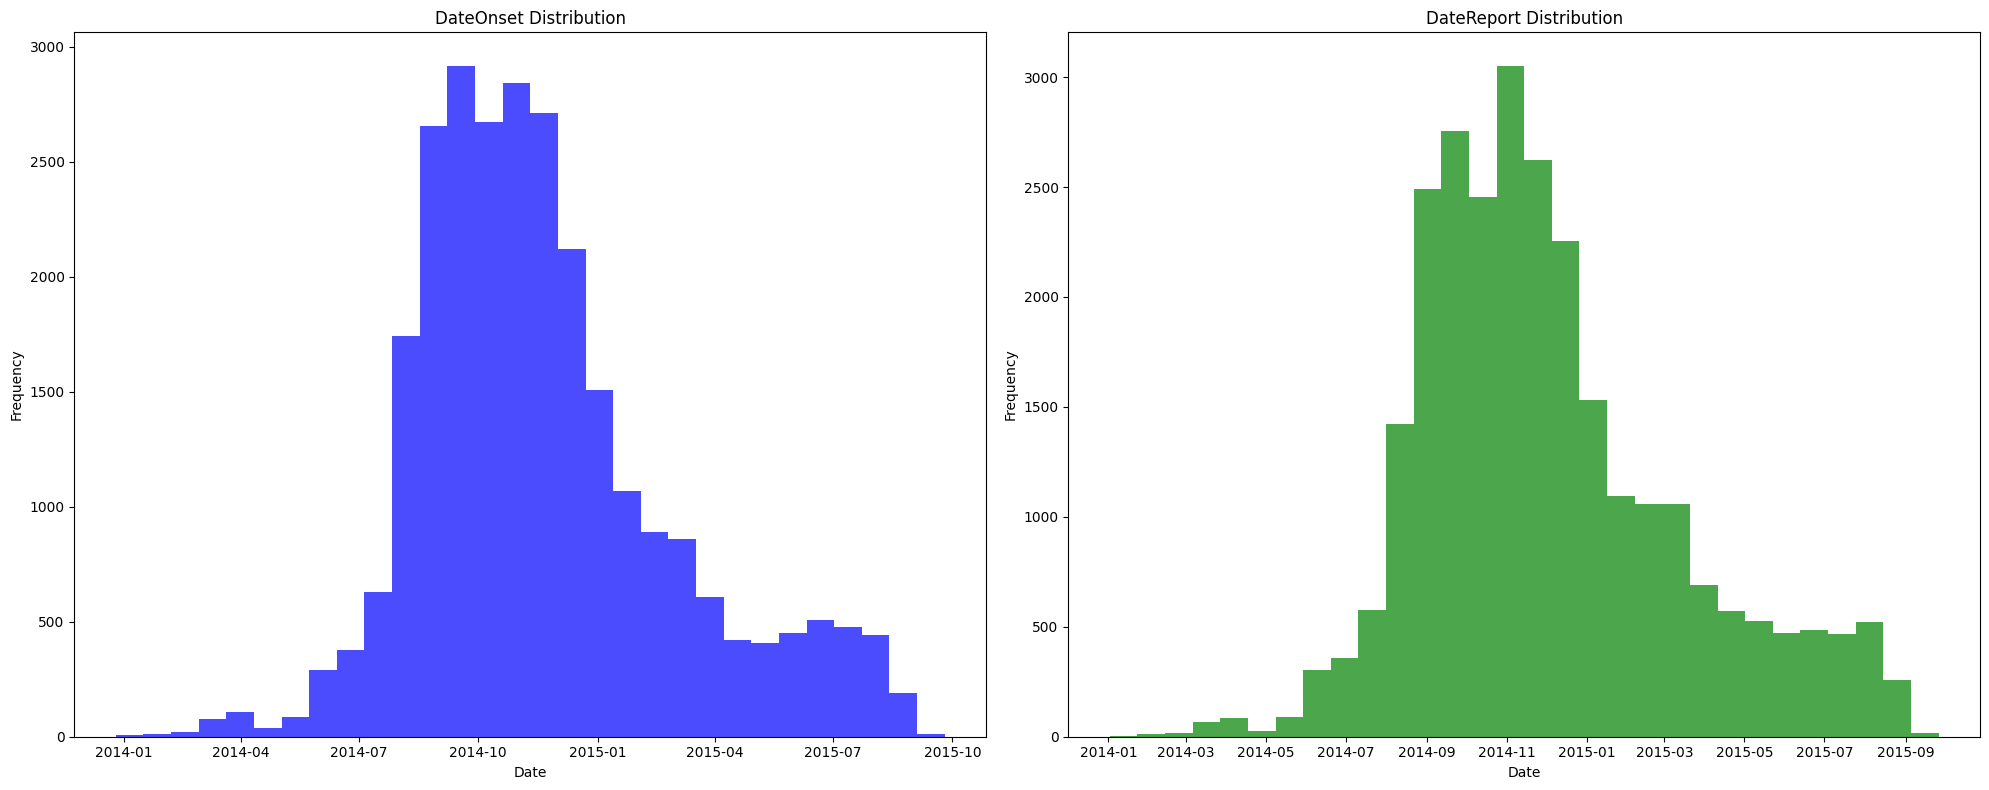

In [35]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.hist(ebola['DateOnset'].dropna(), bins=30, color='blue', alpha=0.7)
plt.title('DateOnset Distribution')
plt.xlabel('Date')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(ebola['DateReport'].dropna(), bins=30, color='green', alpha=0.7)
plt.title('DateReport Distribution')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('./images/date_distribution.png', bbox_inches='tight')
plt.show()

### 2. Plot Case Definition

Text(0, 0.5, 'Number of Incidence')

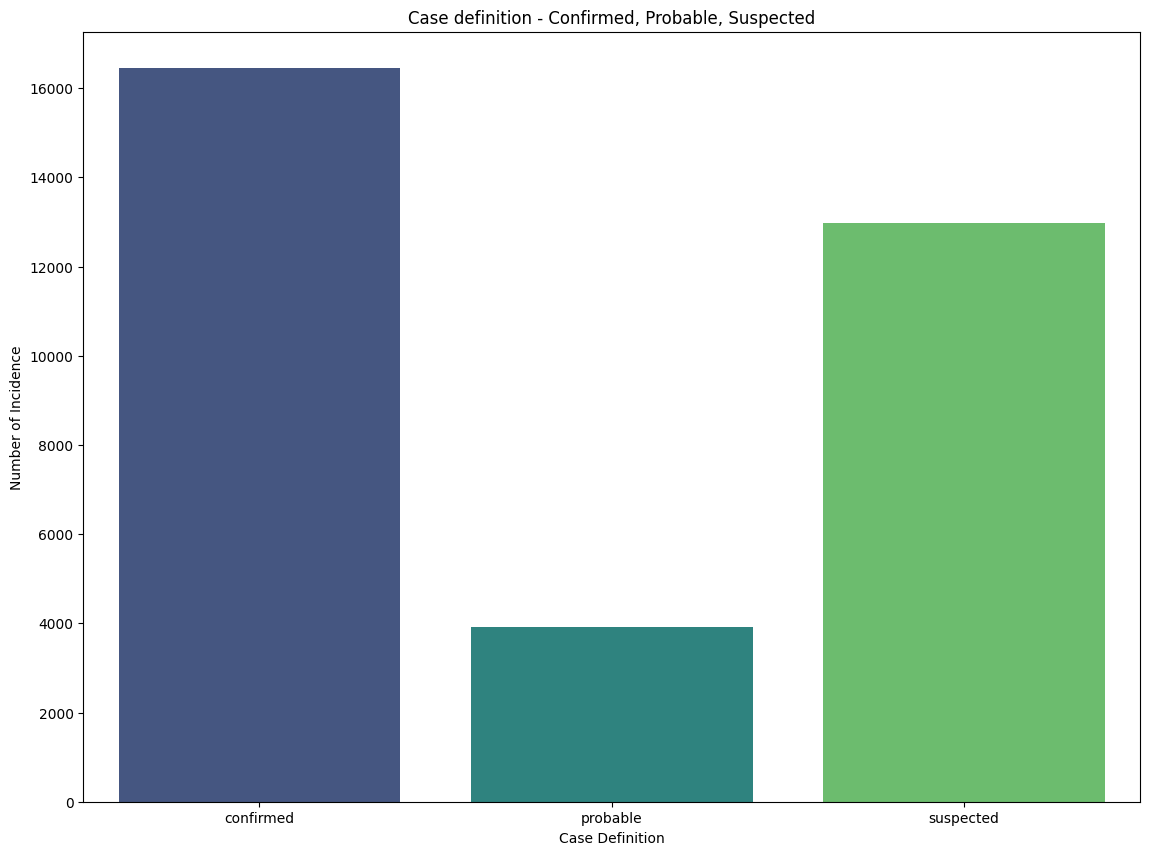

In [36]:
plt.figure(figsize=(30, 10))
plt.subplot(1, 2, 1)
sns.countplot(data = ebola,
              x='EpiCaseDef',
              hue='EpiCaseDef',
              palette='viridis')
plt.title('Case definition - Confirmed, Probable, Suspected')
plt.xlabel('Case Definition')
plt.ylabel('Number of Incidence')

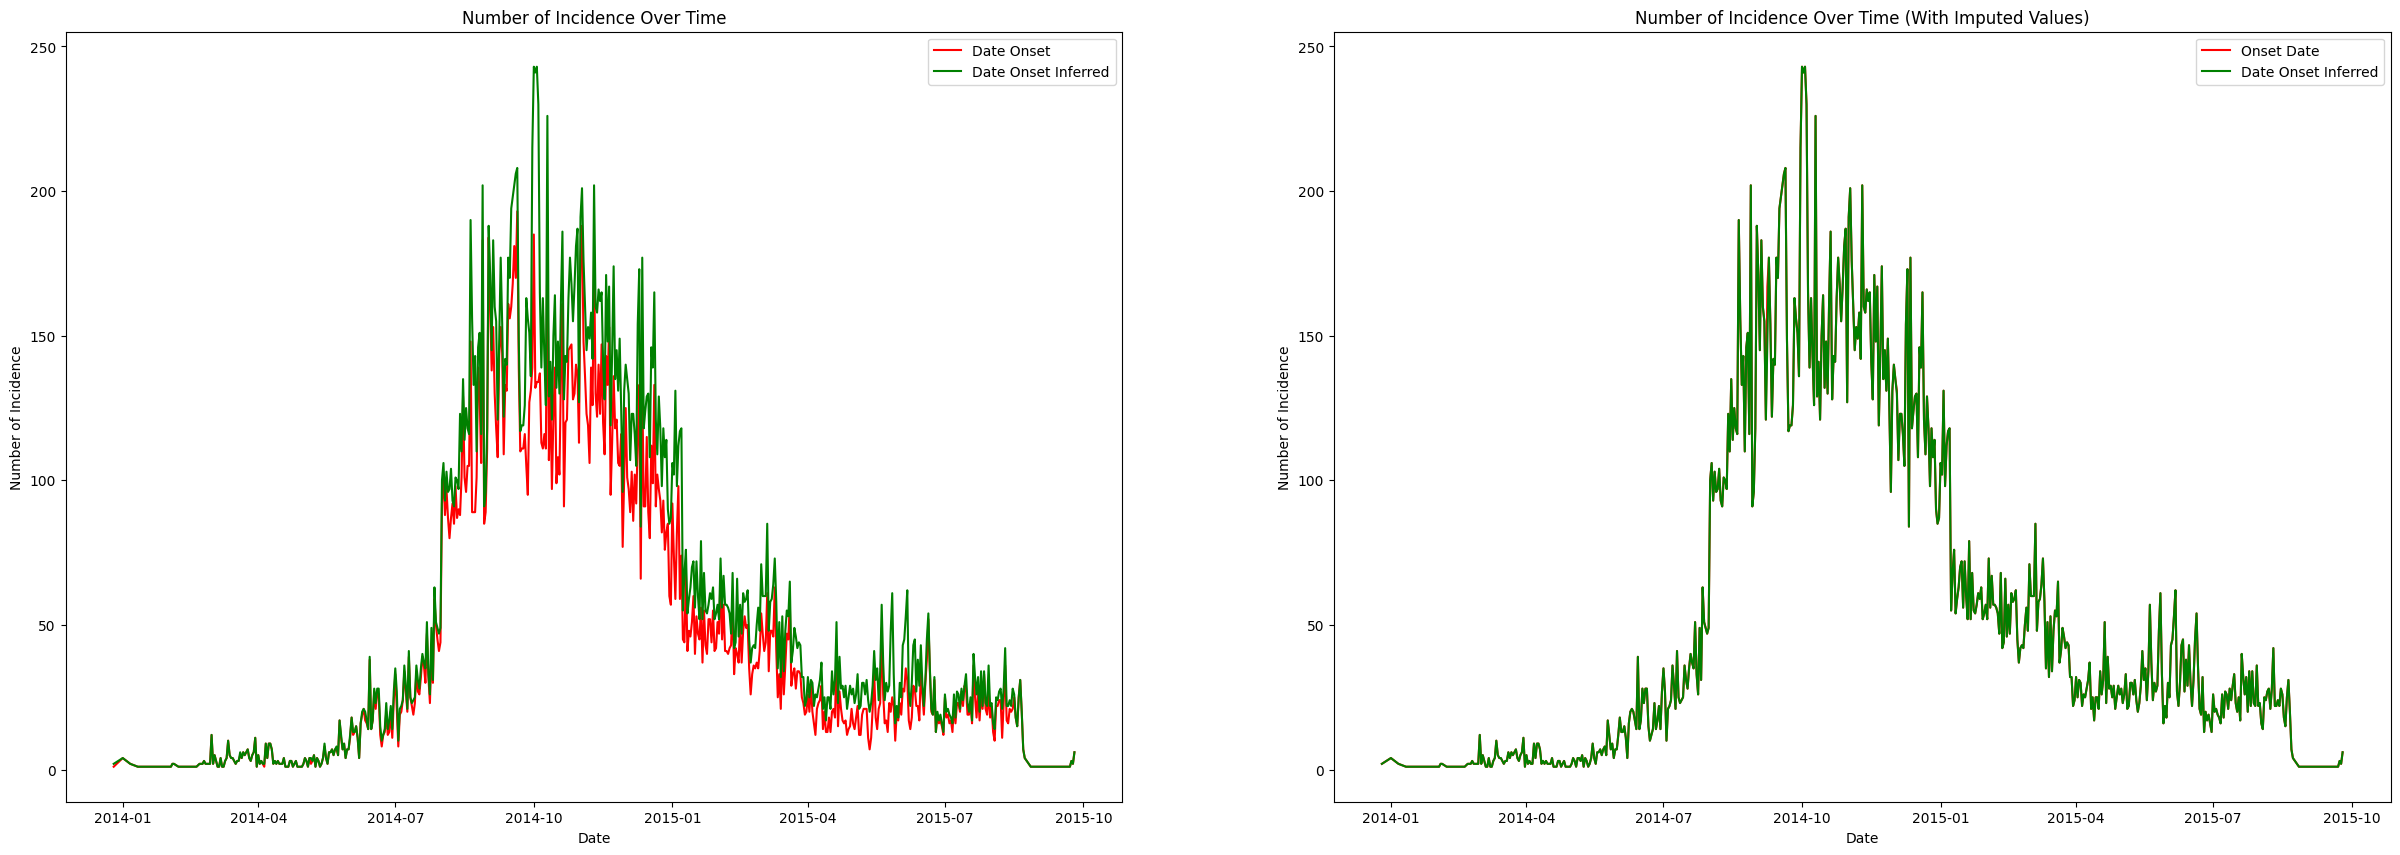

In [37]:
## plot the number of cases over time
plt.figure(figsize=(30, 10))
plt.subplot(1, 2, 1)
plt.plot(ebola['DateOnset'].value_counts().sort_index(), linestyle='-', color='red')
plt.plot(ebola['DateOnsetInferred'].value_counts().sort_index(), linestyle='-', color='green')
plt.title('Number of Incidence Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Incidence')
plt.legend(['Date Onset', 'Date Onset Inferred'])
# plt.xticks(rotation=45)
# plt.grid()
## save plot
# plt.savefig('./images/cases_over_time.png', bbox_inches='tight')
# plt.show()

plt.subplot(1, 2, 2)
plt.plot(ebola['OnsetDate'].value_counts().sort_index(), linestyle='-', color='red')
plt.plot(ebola['DateOnsetInferred'].value_counts().sort_index(), linestyle='-', color='green')
plt.title('Number of Incidence Over Time (With Imputed Values)')
plt.xlabel('Date')
plt.ylabel('Number of Incidence')
plt.legend(['Onset Date', 'Date Onset Inferred'])
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.grid()
## save plot
# plt.savefig('./images/cases_over_time.png', bbox_inches='tight')
plt.show()

### 3. Plot Daily cases

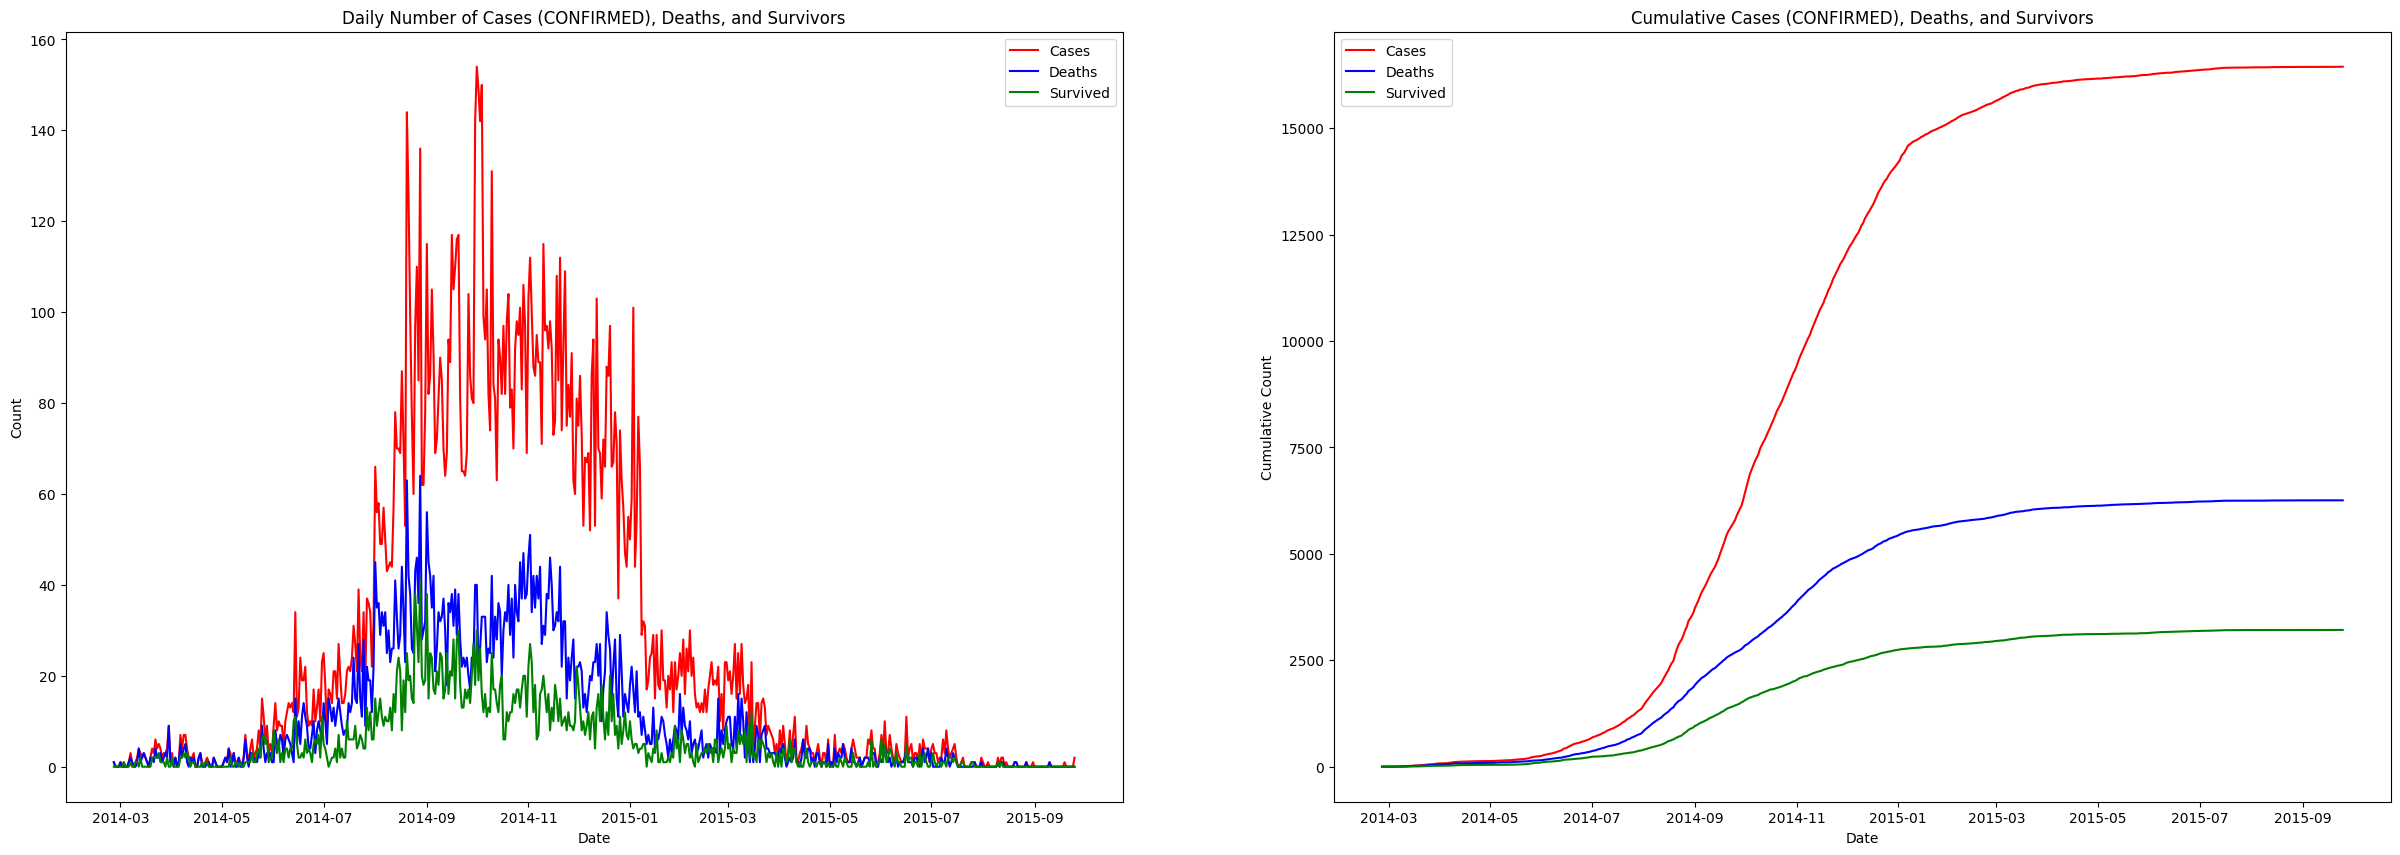

In [38]:
plt.figure(figsize=(30, 10))
plt.subplot(1, 2, 1)
plt.plot(cases_by_day["DateOnset"], cases_by_day["Cases"], linestyle="-", color="red", label="Cases")
plt.plot(death_by_day["DateOnset"], death_by_day["FinalStatus"], linestyle="-", color="blue", label="Deaths")
plt.plot(survive_by_day["DateOnset"], survive_by_day["FinalStatus"], linestyle="-", color="green", label="Survived")
plt.title("Daily Number of Cases (CONFIRMED), Deaths, and Survivors")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()
# plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(cases_by_day["DateOnset"], cases_by_day["CumulativeCases"], linestyle="-", color="red", label="Cases")
plt.plot(death_by_day["DateOnset"], death_by_day["CummulativeDeaths"], linestyle="-", color="blue", label="Deaths")
plt.plot(survive_by_day["DateOnset"], survive_by_day["CummulativeSurvival"], linestyle="-", color="green", label="Survived")
plt.title("Cumulative Cases (CONFIRMED), Deaths, and Survivors")
plt.xlabel("Date")
plt.ylabel("Cumulative Count")
plt.legend()
# plt.tight_layout()
# plt.grid(True)
plt.show()

### 4. Plot Incidence by country

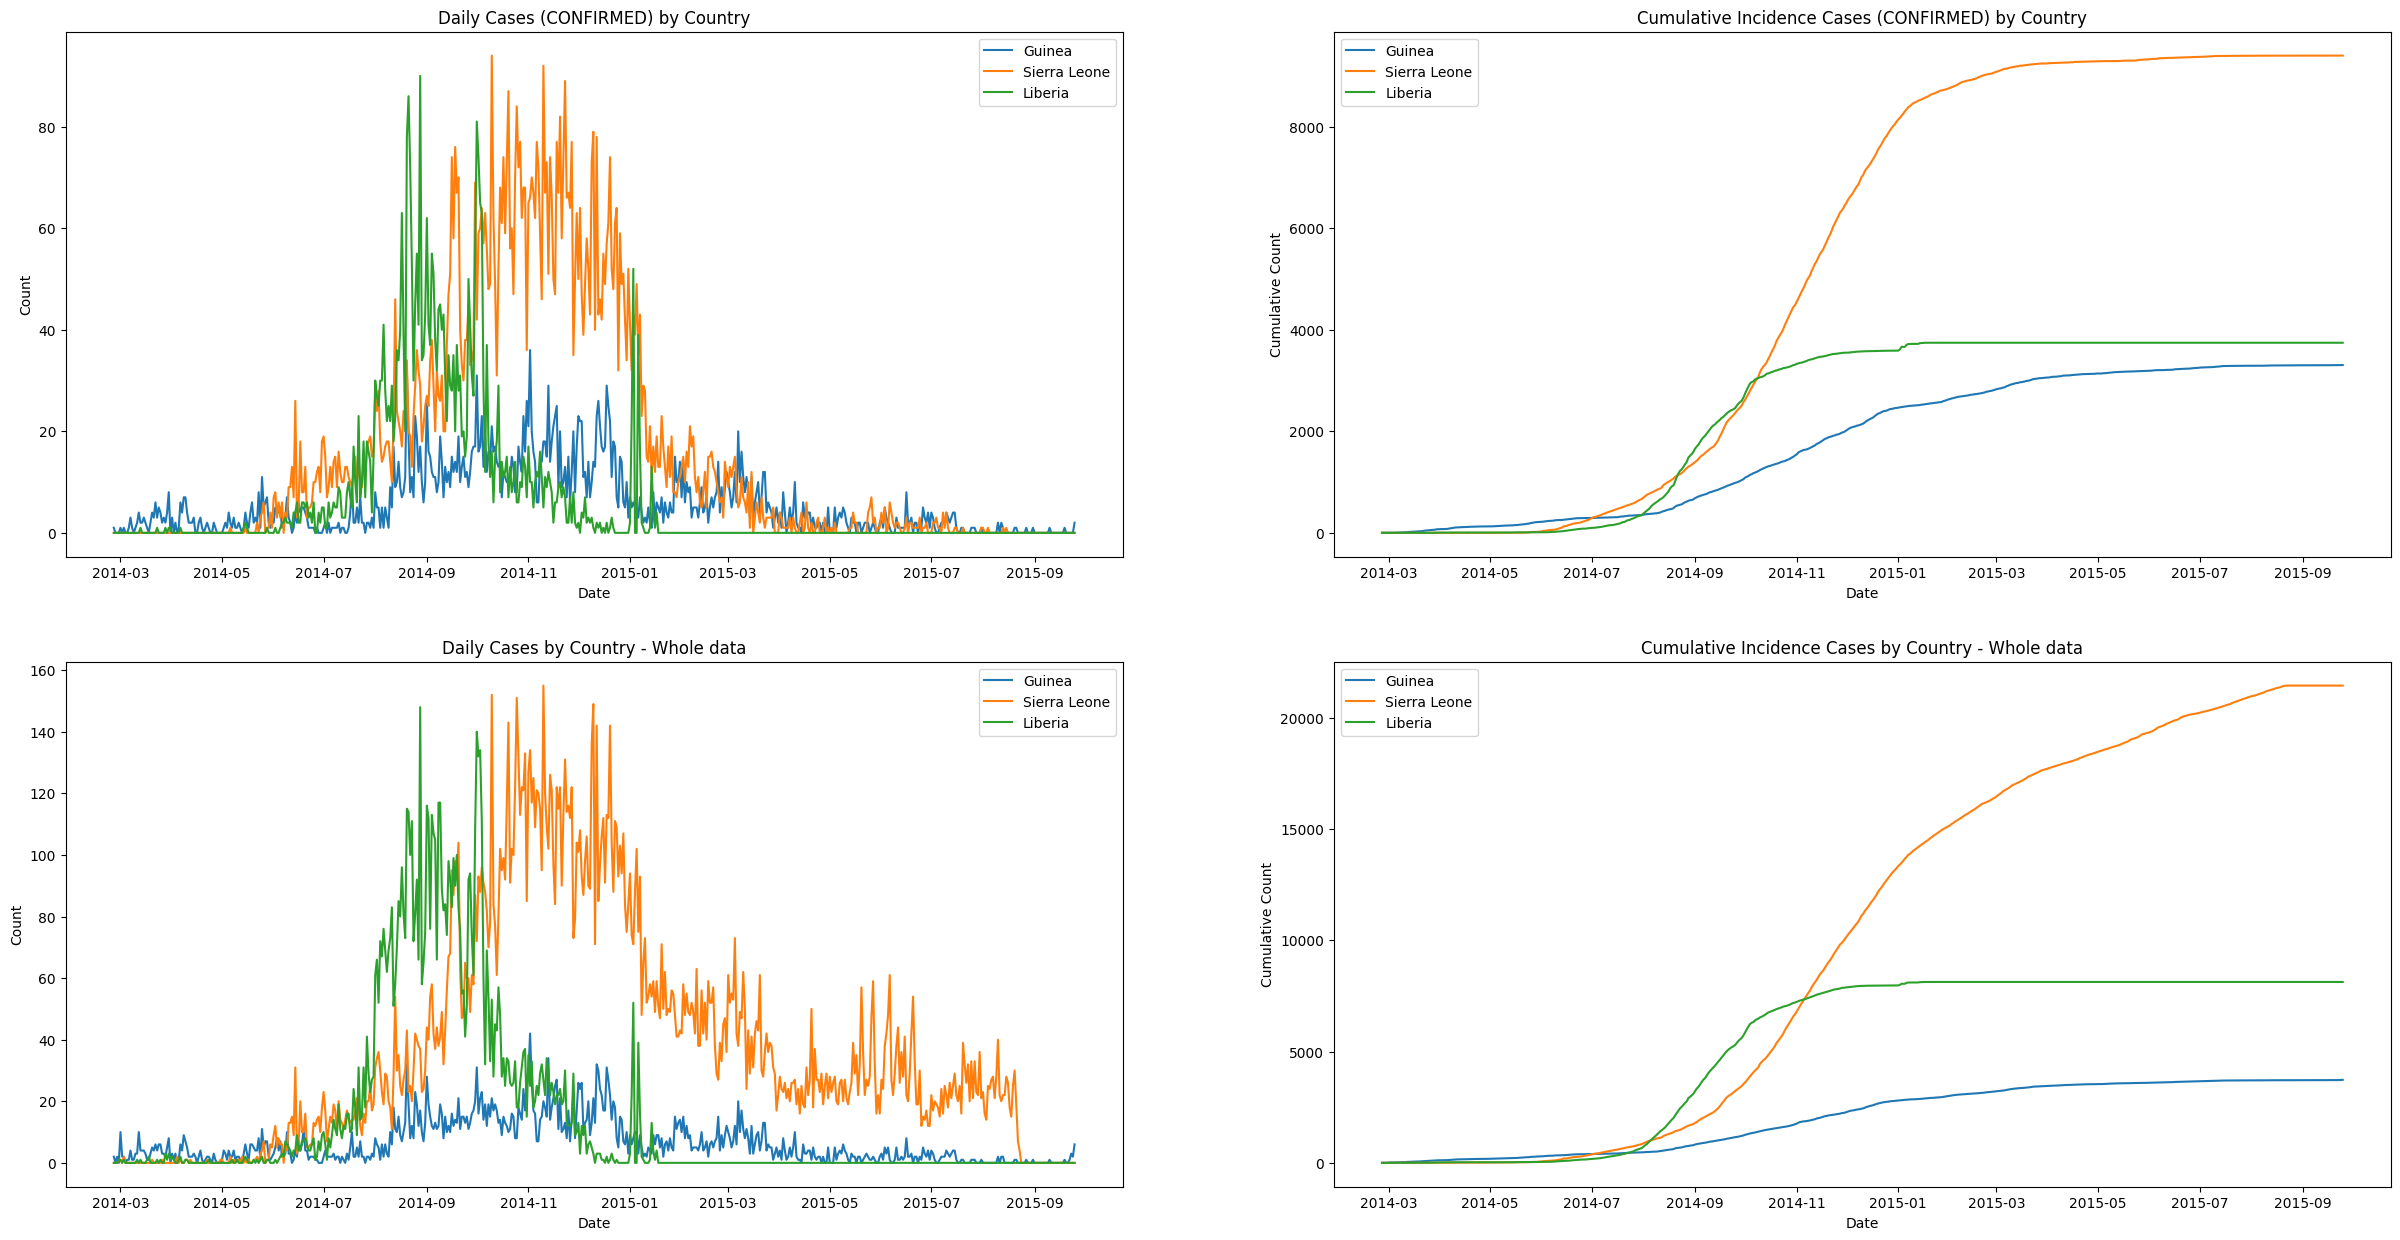

In [39]:
plt.figure(figsize=(30, 15))
plt.subplot(2, 2, 1)
for country in ebola_confirmed["Country"].unique():
    country_data = ebola_confirmed[ebola_confirmed["Country"] == country].groupby("OnsetDate").size().reset_index(name="Cases")
    country_data = country_data.set_index("OnsetDate").reindex(all_dates, fill_value=0).reset_index().rename(columns={"index": "DateOnset"})
    plt.plot(country_data["DateOnset"], country_data["Cases"], linestyle="-", label=country)
plt.title("Daily Cases (CONFIRMED) by Country")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()
# plt.grid(True)

plt.subplot(2, 2, 2)
for country in ebola_confirmed["Country"].unique():
    country_data = ebola_confirmed[ebola_confirmed["Country"] == country].groupby("OnsetDate").size().reset_index(name="Cases")
    country_data = country_data.set_index("OnsetDate").reindex(all_dates, fill_value=0).reset_index().rename(columns={"index": "DateOnset"})
    country_data["CumulativeCases"] = country_data["Cases"].cumsum()
    plt.plot(country_data["DateOnset"], country_data["CumulativeCases"], linestyle="-", label=country)
plt.title("Cumulative Incidence Cases (CONFIRMED) by Country")
plt.xlabel("Date")
plt.ylabel("Cumulative Count")
plt.legend()
# plt.tight_layout()
# plt.grid()
# plt.savefig('./images/cases_by_country.png', bbox_inches='tight')


plt.subplot(2, 2, 3)
for country in ebola["Country"].unique():
    country_data = ebola[ebola["Country"] == country].groupby("OnsetDate").size().reset_index(name="Cases")
    country_data = country_data.set_index("OnsetDate").reindex(all_dates, fill_value=0).reset_index().rename(columns={"index": "DateOnset"})
    plt.plot(country_data["DateOnset"], country_data["Cases"], linestyle="-", label=country)
plt.title("Daily Cases by Country - Whole data")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()
# plt.grid(True)

plt.subplot(2, 2, 4)
for country in ebola["Country"].unique():
    country_data = ebola[ebola["Country"] == country].groupby("OnsetDate").size().reset_index(name="Cases")
    country_data = country_data.set_index("OnsetDate").reindex(all_dates, fill_value=0).reset_index().rename(columns={"index": "DateOnset"})
    country_data["CumulativeCases"] = country_data["Cases"].cumsum()
    plt.plot(country_data["DateOnset"], country_data["CumulativeCases"], linestyle="-", label=country)
plt.title("Cumulative Incidence Cases by Country - Whole data")
plt.xlabel("Date")
plt.ylabel("Cumulative Count")
plt.legend()
# plt.tight_layout()
# plt.grid()
# plt.savefig('./images/cases_by_country.png', bbox_inches='tight')
plt.show()

### 5. Let's plot the Spatia Cases accross the countries

In [40]:
# Count cases by country
cases_by_country = ebola["CL_DistrictRes"].value_counts().reset_index()
cases_by_country.columns = ['Districts', 'cases']

# Merge with world data
world_with_cases = districts_filter.merge(cases_by_country, how='left', left_on='NAME_2', right_on='Districts')

In [41]:
print(world_with_cases[world_with_cases['Districts'].isna()])


   COUNTRY  NAME_1    NAME_2  \
69  Guinea    Boké    Gaoual   
70  Guinea    Boké  Koundara   
79  Guinea  Kankan  Mandiana   
86  Guinea    Labé    Koubia   
87  Guinea    Labé      Labé   
88  Guinea    Labé   Lélouma   
92  Guinea   Mamou     Mamou   

                                             geometry Districts  cases  
69  POLYGON ((-13.2189 12.00537, -13.20773 12.0101...       NaN    NaN  
70  MULTIPOLYGON (((-13.28435 12.0102, -13.28436 1...       NaN    NaN  
79  POLYGON ((-8.00599 10.12227, -8.01127 10.10785...       NaN    NaN  
86  POLYGON ((-11.86177 11.52946, -11.87452 11.503...       NaN    NaN  
87  POLYGON ((-12.20174 11.49307, -12.16503 11.493...       NaN    NaN  
88  POLYGON ((-12.98692 11.24508, -12.99171 11.256...       NaN    NaN  
92  POLYGON ((-12.16398 10.00151, -12.14164 10.007...       NaN    NaN  


----------------------------------------------------------------------------------------------------------------------------

These Districts do not have any incidence recorded in the Ebola dataset. Hence we will use **GREEN** color as their map representation. There are **7** Districsts that do not have any incidence recorded in the data.

----------------------------------------------------------------------------------------------------------------------------

In [42]:
# world_with_cases['cases']=world_with_cases['cases'].fillna(0)
districts_filter['COUNTRY'].unique()

array(['Liberia', 'Guinea', 'Sierra Leone'], dtype=object)

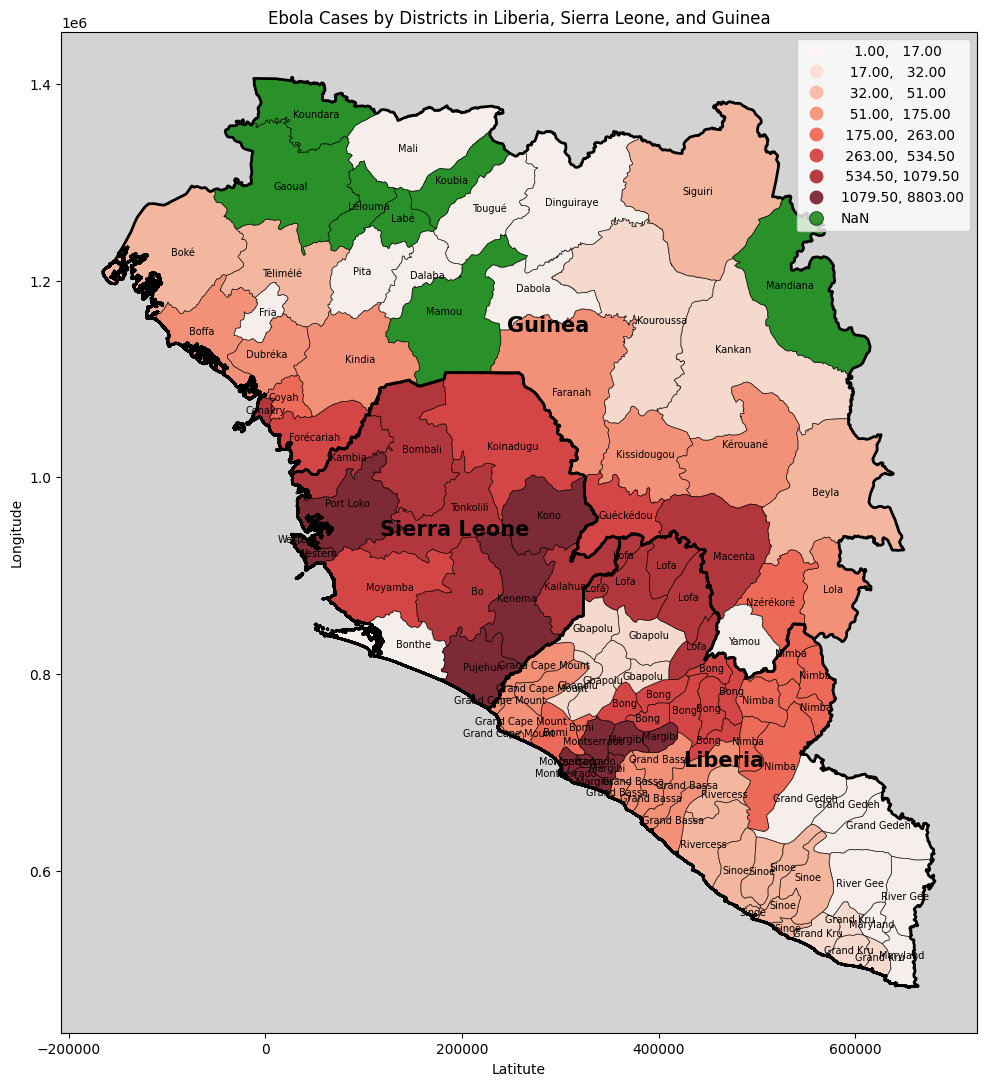

In [43]:
# Reproject to UTM Zone 29N (suitable for Liberia, Sierra Leone, Guinea)
world_with_cases = world_with_cases.to_crs(epsg=32629)

# Load country boundaries and filter for Liberia, Sierra Leone, and Guinea
countries = country_filter[country_filter['COUNTRY'].isin(['Liberia', 'Sierra Leone', 'Guinea'])]
countries = countries.to_crs(epsg=32629)  # Reproject to match world_with_cases

# Plot
fig, ax = plt.subplots(figsize=(30, 13))
ax.set_facecolor('lightgray')  # Add a light background

# Plot the choropleth map for the country

world_with_cases.plot(
            column='cases', ax=ax, legend=True,
            missing_kwds={'color': 'green'},
            cmap='Reds', edgecolor='black',
            linewidth=0.5, alpha=0.8,
            scheme='quantiles', k=8
        )

# Plot country boundaries with a thicker line
countries.boundary.plot(ax=ax, color='black', linewidth=2)

# Add country names at the centroids
for idx, row in countries.iterrows():
    centroid = row.geometry.centroid
    ax.text(centroid.x, centroid.y, row['COUNTRY'], fontsize=15, fontweight='bold', color='black', ha='center', va='center')

# Add region names using representative_point() to reduce overlap
for point, label in zip(world_with_cases.geometry.representative_point(),
                        world_with_cases['NAME_2']):
    ax.text(point.x, point.y, label, fontsize=7, ha='center', va='center')

# Update the title and remove axes labels
plt.title('Ebola Cases by Districts in Liberia, Sierra Leone, and Guinea')
ax.set_xlabel('Latitute')
ax.set_ylabel('Longitude')

# Save the plot
plt.savefig('./images/cases_by_district_map2.png', bbox_inches='tight')

plt.show()

### Country by Country Ebola Cases

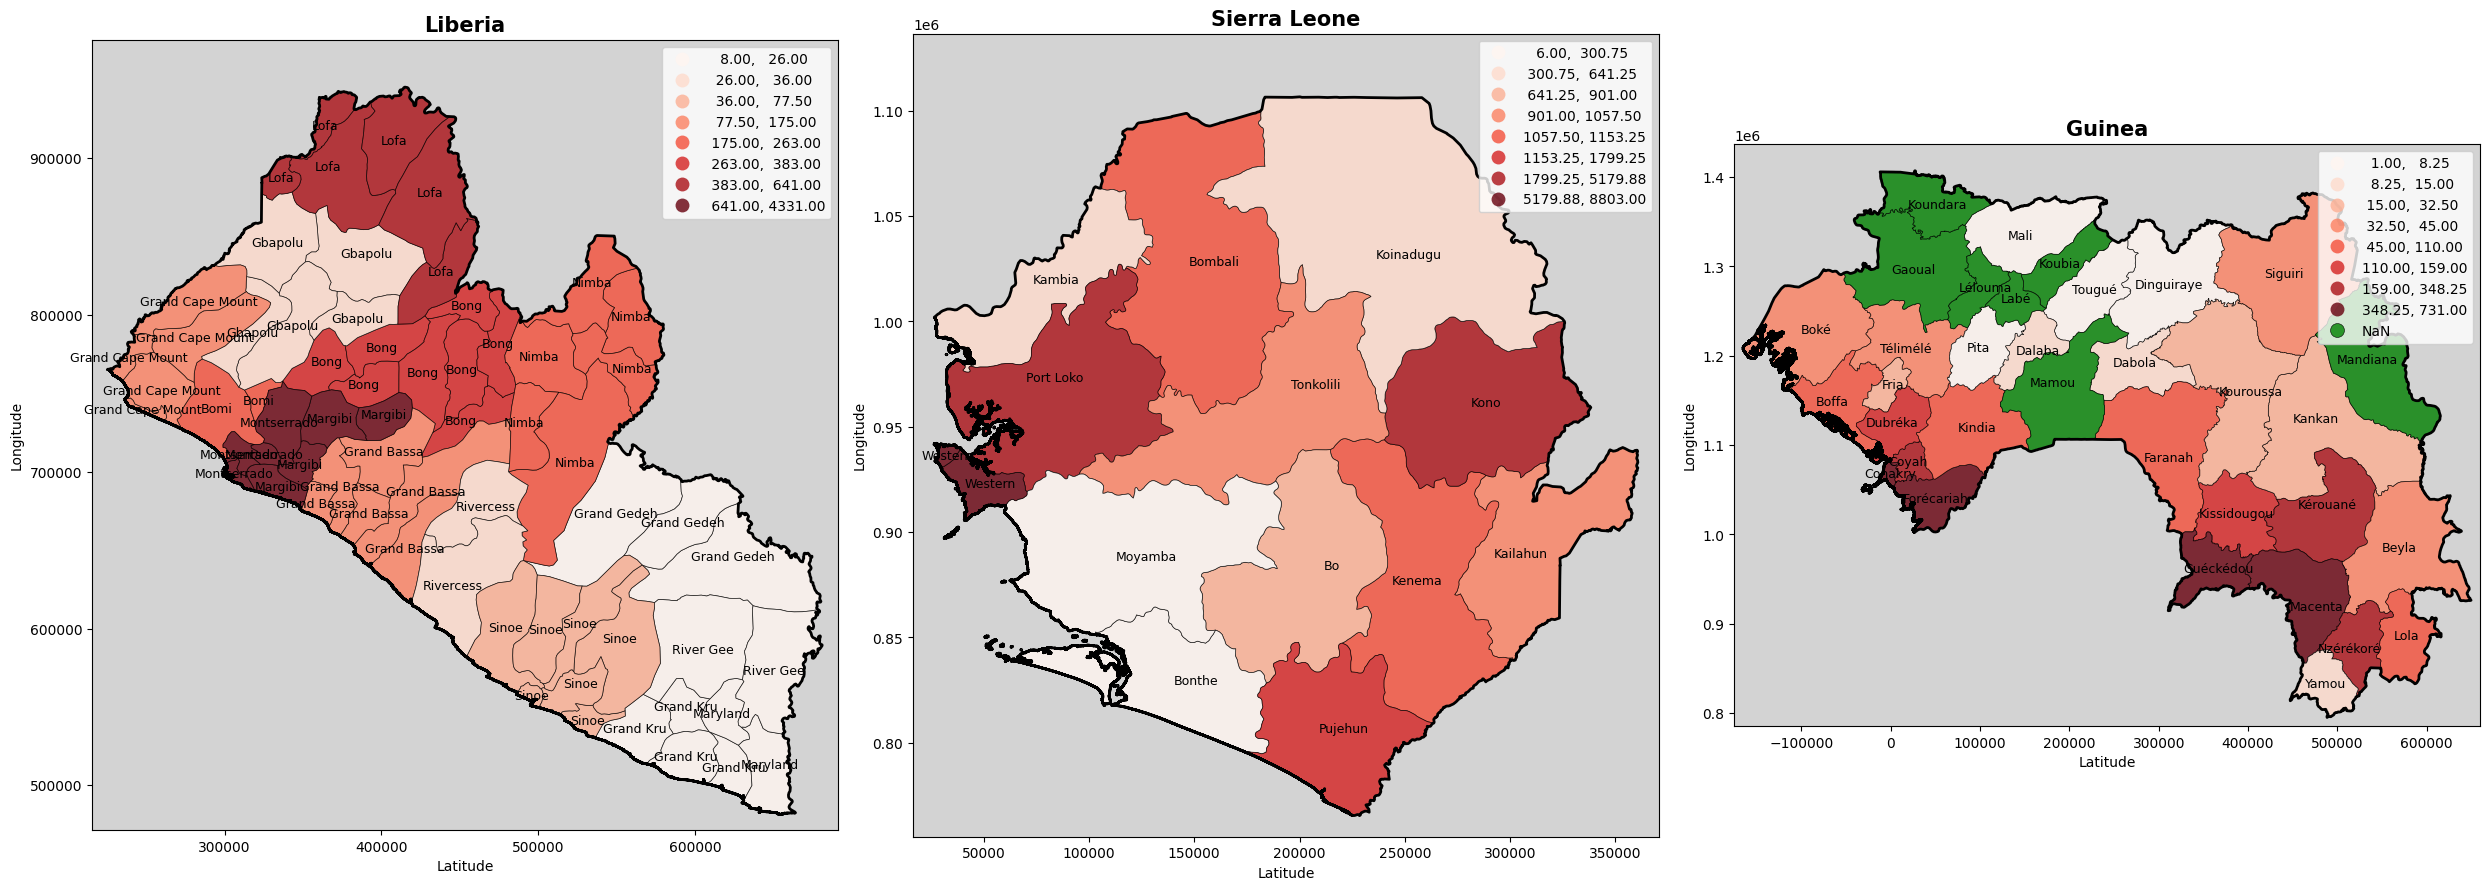

In [44]:
# Reproject to UTM Zone 29N (suitable for Liberia, Sierra Leone, Guinea)
world_with_cases = world_with_cases.to_crs(epsg=32629)

# Load country boundaries and filter for Liberia, Sierra Leone, and Guinea
countries = country_filter[country_filter['COUNTRY'].isin(['Liberia', 'Sierra Leone', 'Guinea'])]
countries = countries.to_crs(epsg=32629)  # Reproject to match world_with_cases

# Create a figure with 3 subplots (one for each country)
fig, axes = plt.subplots(1, 3, figsize=(25, 15))
# fig.suptitle('Ebola Cases by Districts in Liberia, Sierra Leone, and Guinea', fontsize=16)

# List of countries to iterate over
country_list = ['Liberia', 'Sierra Leone', 'Guinea']

# Plot each country in a separate subplot
for ax, country in zip(axes, country_list):
    ax.set_facecolor('lightgray')  # Add a light background

    # Filter the data for the specific country
    country_data = world_with_cases[world_with_cases['COUNTRY'] == country]
    country_boundary = countries[countries['COUNTRY'] == country]

    # Plot the choropleth map for the country

    country_data.plot(
            column='cases', ax=ax, legend=True,
            missing_kwds={'color': 'green'},
            cmap='Reds', edgecolor='black',
            linewidth=0.5, alpha=0.8,
            scheme='quantiles', k=8
    )

    # Plot country boundary with a thicker line
    country_boundary.boundary.plot(ax=ax, color='black', linewidth=2)

    # Add region names using representative_point() to reduce overlap
    for point, label in zip(country_data.geometry.representative_point(), country_data['NAME_2']):
        ax.text(point.x, point.y, label, fontsize=9, ha='center', va='center')

    # Set title for each subplot
    ax.set_title(country, fontsize=15, fontweight='bold')
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Longitude')

    # Set consistent aspect ratio for all subplots
    ax.set_aspect('equal')

    # Optional: Adjust axis limits to focus on the country (this helps with consistent scaling)
    bounds = country_data.total_bounds
    ax.set_xlim(bounds[0] - 10000, bounds[2] + 10000)
    ax.set_ylim(bounds[1] - 10000, bounds[3] + 30000)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the plot
plt.savefig('./images/cases_by_district_separate.png', bbox_inches='tight')

plt.show()

# 4. Prepare the Data for Modelling

In [45]:
## get patches
patch_names = ["Guinea", "Liberia", "Sierra Leone"]
n_patches = len(patch_names)

## get the start date and end date
start_date = ebola["OnsetDate"].min()
end_date = ebola["OnsetDate"].max()

# Create a date range for weekly data
weeks = pd.date_range(start=start_date, end=end_date, freq="W-MON")
T = len(weeks)

# Create an empty array to store observed cases
I_obs = np.zeros((T, n_patches))

# Fill the observed cases array with weekly data for each patch
for i, country in enumerate(patch_names):
    country_data = ebola[ebola["Country"] == country]
    weekly_cases = country_data.groupby(pd.Grouper(key="OnsetDate", freq="W-MON")).size()
    weekly_cases = weekly_cases.reindex(weeks, fill_value=0)
    I_obs[:, i] = weekly_cases.values

# Create a DataFrame for plotting
time = np.arange(1, T + 1)
data_plot = pd.DataFrame(I_obs, columns=patch_names)
data_plot["Time"] = time
data_plot["Week"] = weeks[:].strftime("%Y-%m-%d")
# Melt the DataFrame for easier plotting
data_plot = data_plot.melt(id_vars=["Time", "Week"], var_name="Patches", value_name="Cases")

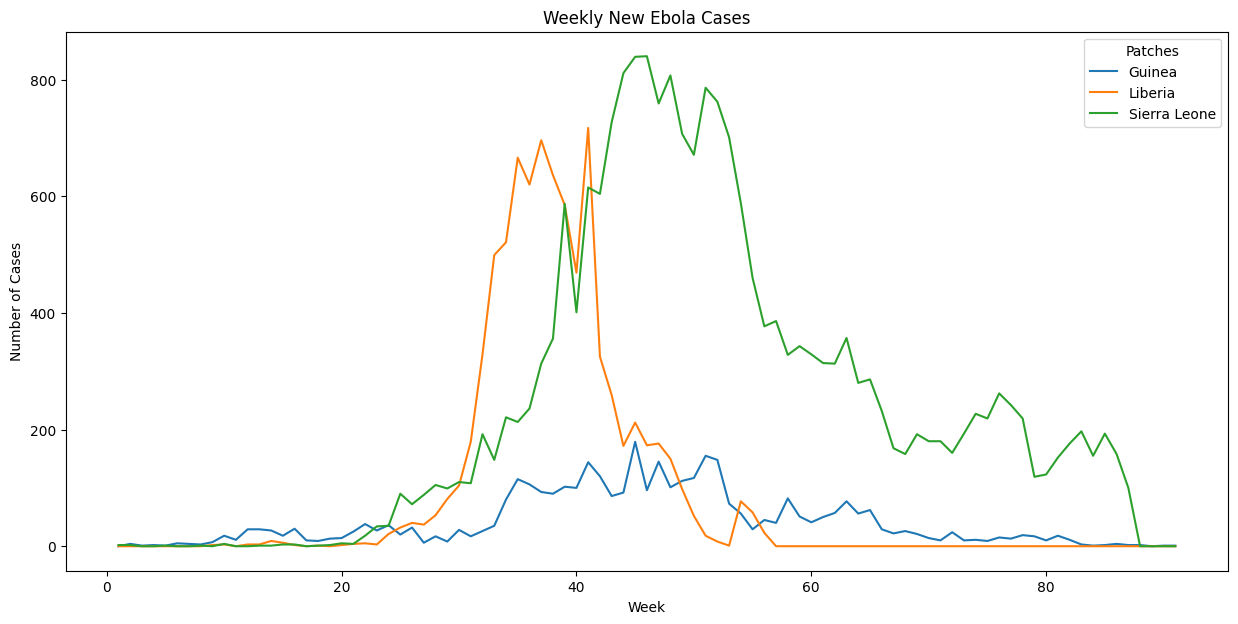

In [46]:
plt.figure(figsize=(15, 7))
sns.lineplot(data=data_plot, x="Time", y="Cases", hue="Patches")
plt.title("Weekly New Ebola Cases")
plt.xlabel("Week")
plt.ylabel("Number of Cases")
# plt.grid(True)
plt.savefig('./images/weekly_cases.pdf', bbox_inches='tight')
plt.show()

# 4. Fitting a Simple SEIR model


## 1. Simple SEIR Model

With this simple model, Guinea, Liberia, and Sierra Leone will be treated as one patch, and we’ll fit a Susceptible(S), Exposed(E), Infectious(I), and Recovered(R) model to the entire incidence data. The model is given below:

$$ \frac{dS}{dt} = -\beta S \frac{I}{N}$$

$$ \frac{dE}{dt} = \beta S \frac{I}{N} - \sigma E$$

$$\frac{dI}{dt} = \sigma E - \gamma I$$

$$\frac{dR}{dt} = \gamma I$$

Where:
- $ S, E, I, R $: Susceptible, Exposed, Infectious, and Recovered individuals respectively.
- $ N $: Total population.
- $ \beta$: Transmission rate.
- $ \sigma $: Rate of progression from Exposed to Infectious (inverse of the latent period).
- $ \gamma $: Recovery rate (inverse of the infectious period).

### New Infections
- The rate at which individuals move from the Exposed ($E$) to the infectious ($I$) compartment at time t is given as:
$$
\sigma E(t)
$$

- The number of new infectious individuals at time $ t $ is given by the inflow into the Infectious compartment:
  $$
  \text{New Infectious}(t) = \int_{t-1}^t\sigma E(s) ds
  $$

### Observation Model
- We'll use a Negative Binomial distribution to model the observed incidence data, accounting for overdispersion:
  $$
  I_{\text{obs}}[t] \sim \text{NegativeBinomial}(\sigma E(t), \phi)
  $$
  where $ \phi $ is the dispersion parameter.

### Initial Conditions and Parameters
- **Initial Conditions**:
  - At $ t = 0 $, assume $ S(0) \approx N$, $ E(0) = I(0) = 1 $, $ R(0) = 0 $, since the outbreak started with a small number of exposed and infectious individuals.

- **Parameters to Estimate**:
  - $ \beta $: Transmission rate for each patch.
  - $ \phi $: Dispersion parameter for the Negative Binomial distribution.
  - $ \sigma $: Rate of progression from Exposed to Infectious (fixed at 1/5.3 days, based on Faye et al., 2015).
  - $ \gamma $: Recovery rate (fixed at 1/5 days, based on Faye et al., 2015).

### Discretization
Since the data is weekly, we'll discretize the ODEs using a daily Euler method and aggregate the new infectious individuals into weekly counts to match `I_obs`.

In [47]:
weekly_cases = data_plot.groupby("Time")["Cases"].sum()

# Ensure y has exactly T elements
y = weekly_cases.values.astype(int)

In [48]:
# Population sizes (approximate, in millions)
n = np.array([11.5e6, 4.5e6, 6.8e6])  # Guinea, Liberia, Sierra Leone

N = 35000  # Total population

# Prepare data for Stan
stan_data = {
    "T": T,
    "t0": 0,
    # "n_patches": n_patches,
    "ts": time,
    "cases": y,
    "N": N,
    "I0": 1
}

# Print data summary
print("Stan Data Summary:")
print(f"T: {stan_data['T']}")
# print(f"n_patches: {stan_data['n_patches']}")
print(f"N: {stan_data['N']}")
# print(f"E0: {stan_data['E0']}")
print(f"I0: {stan_data['I0']}")

Stan Data Summary:
T: 91
N: 35000
I0: 1


In [ ]:
# Compile and fit the model
model = CmdStanModel(stan_file="seir_model.stan")
fit = model.sample(
    data=stan_data,
    chains=4,
    iter_warmup= 500,
    iter_sampling=1000,
    seed=123
)

# Convert to ArviZ InferenceData for analysis
inference_data = az.from_cmdstanpy(fit)

DEBUG:cmdstanpy:Removing /media/brasammy/5B6DAD9B6A1F7E40/Projects/Thesis/Main/Final_work/thesis/seir_model
12:58:25 - cmdstanpy - INFO - compiling stan file /media/brasammy/5B6DAD9B6A1F7E40/Projects/Thesis/Main/Final_work/thesis/seir_model.stan to exe file /media/brasammy/5B6DAD9B6A1F7E40/Projects/Thesis/Main/Final_work/thesis/seir_model
INFO:cmdstanpy:compiling stan file /media/brasammy/5B6DAD9B6A1F7E40/Projects/Thesis/Main/Final_work/thesis/seir_model.stan to exe file /media/brasammy/5B6DAD9B6A1F7E40/Projects/Thesis/Main/Final_work/thesis/seir_model
DEBUG:cmdstanpy:cmd: make STANCFLAGS+=--filename-in-msg=seir_model.stan /media/brasammy/5B6DAD9B6A1F7E40/Projects/Thesis/Main/Final_work/thesis/seir_model
cwd: /home/brasammy/.cmdstan/cmdstan-2.36.0


DEBUG:cmdstanpy:Console output:

--- Translating Stan model to C++ code ---
bin/stanc --filename-in-msg=seir_model.stan --o=/media/brasammy/5B6DAD9B6A1F7E40/Projects/Thesis/Main/Final_work/thesis/seir_model.hpp /media/brasammy/5B6DAD9B6A1F7E40/Projects/Thesis/Main/Final_work/thesis/seir_model.stan

--- Compiling C++ code ---
g++ -std=c++17 -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes -Wno-class-memaccess      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I stan/lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.4.0 -I stan/lib/stan_math/lib/boost_1.84.0 -I stan/lib/stan_math/lib/sundials_6.1.1/include -I stan/lib/stan_math/lib/sundials_6.1.1/src/sundials    -DBOOST_DISABLE_ASSERTS          -c -Wno-ignored-attributes   -x c++ -o /media/brasammy/5B6DAD9B6A1F7E40/Projects/Thesis/Main/Final_work/thesis/seir_model.o /media/brasammy/5B6DAD9B6A1F7E40/Projects/Thesis/Main/Final_work/thesis/seir_model.hp


13:00:19 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/media/brasammy/5B6DAD9B6A1F7E40/Projects/Thesis/Main/Final_work/thesis/seir_model', 'id=1', 'random', 'seed=123', 'data', 'file=/tmp/tmpw0u1dcbn/aby_7d95.json', 'output', 'file=/tmp/tmpw0u1dcbn/seir_modelw5q_7pzb/seir_model-20250428125837_1.csv', 'method=sample', 'num_samples=1000', 'num_warmup=500', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpw0u1dcbn/seir_modelw5q_7pzb/seir_model-20250428125837_1.csv
 console_msgs (if any):
	/tmp/tmpw0u1dcbn/seir_modelw5q_7pzb/seir_model-20250428125837_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 1000 (Default)
    num_warmup = 500
    save_warmup = false (Default)
    thin = 1 (Default)
    adapt
      engaged = true (

In [ ]:
print(fit.diagnose())

DEBUG:cmdstanpy:cmd: /home/brasammy/.cmdstan/cmdstan-2.36.0/bin/diagnose /tmp/tmpw0u1dcbn/seir_modelw5q_7pzb/seir_model-20250428125837_1.csv /tmp/tmpw0u1dcbn/seir_modelw5q_7pzb/seir_model-20250428125837_2.csv /tmp/tmpw0u1dcbn/seir_modelw5q_7pzb/seir_model-20250428125837_3.csv /tmp/tmpw0u1dcbn/seir_modelw5q_7pzb/seir_model-20250428125837_4.csv
cwd: None


Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Rank-normalized split effective sample size satisfactory for all parameters.

Rank-normalized split R-hat values satisfactory for all parameters.

Processing complete, no problems detected.



In [ ]:
# Summary of parameter estimates
summary = az.summary(inference_data, var_names=["beta", "sigma", "gamma", "R0",'predicted_cases'])
# print(summary)

# Extract posterior samples
posterior = fit.draws_pd()

## save the posterior samples
posterior.to_csv('./Data/posterior_samples.csv', index=False)

In [ ]:
summary

mean      sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
beta                  1.475   0.142   1.217    1.732      0.003    0.002   
sigma                 0.082   0.006   0.072    0.093      0.000    0.000   
gamma                 0.077   0.020   0.041    0.113      0.000    0.000   
R0                   20.280   4.939  11.583   29.637      0.101    0.096   
predicted_cases[0]    0.059   0.254   0.000    0.000      0.004    0.011   
...                     ...     ...     ...      ...        ...      ...   
predicted_cases[86]  41.624  41.217   0.000  111.000      0.656    1.081   
predicted_cases[87]  39.336  38.620   0.000  109.000      0.612    0.920   
predicted_cases[88]  36.412  34.509   0.000   97.000      0.553    0.842   
predicted_cases[89]  33.884  33.100   0.000   93.000      0.520    0.779   
predicted_cases[90]  29.292  27.745   0.000   78.000      0.439    0.574   

                     ess_bulk  ess_tail  r_hat  
beta                   1725.0    2281.0    1.0  
sigma                  1653.0    2318.0    1.0  
gamma                  2385.0    2354.0    1.0  
R0                     2418.0    2633.0    1.0  
predicted_cases[0]     3802.0    3757.0    1.0  
...                       ...       ...    ...  
predicted_cases[86]    3734.0    3879.0    1.0  
predicted_cases[87]    3908.0    3712.0    1.0  
predicted_cases[88]    3891.0    3775.0    1.0  
predicted_cases[89]    3914.0    3649.0    1.0  
predicted_cases[90]    3878.0    3825.0    1.0  

[95 rows x 9 columns]

### Trace Plota

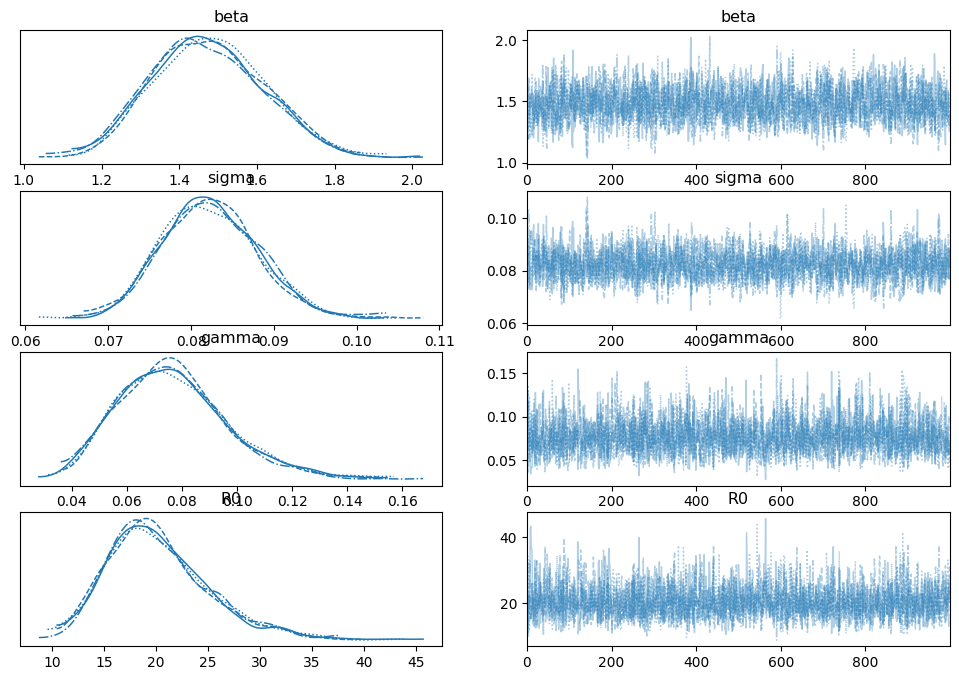

In [ ]:
## trace plots
az.plot_trace(fit, var_names=["beta", "sigma", "gamma", "R0"])
plt.show()

In [ ]:
sm = fit.summary()
print(sm)

DEBUG:cmdstanpy:cmd: /home/brasammy/.cmdstan/cmdstan-2.36.0/bin/stansummary --percentiles= 5,50,95 --sig_figs=6 --csv_filename=/tmp/tmpw0u1dcbn/stansummary-seir_model-2hk69k4_.csv /tmp/tmpw0u1dcbn/seir_modelw5q_7pzb/seir_model-20250428125837_1.csv /tmp/tmpw0u1dcbn/seir_modelw5q_7pzb/seir_model-20250428125837_2.csv /tmp/tmpw0u1dcbn/seir_modelw5q_7pzb/seir_model-20250428125837_3.csv /tmp/tmpw0u1dcbn/seir_modelw5q_7pzb/seir_model-20250428125837_4.csv
cwd: None


                           Mean      MCSE     StdDev        MAD          5%  \
lp__                -652.554000  0.042159   1.653780   1.445530 -655.747000   
beta                   1.475340  0.003380   0.142200   0.145888    1.252700   
sigma                  0.082321  0.000145   0.005820   0.005825    0.073415   
gamma                  0.076999  0.000410   0.019936   0.019451    0.047966   
phi_inv                0.862543  0.003181   0.153814   0.147496    0.637012   
...                         ...       ...        ...        ...         ...   
predicted_cases[87]   41.624300  0.658212  41.216600  29.652000    2.000000   
predicted_cases[88]   39.335500  0.612982  38.620500  28.169400    2.000000   
predicted_cases[89]   36.412000  0.556602  34.508800  25.204200    2.000000   
predicted_cases[90]   33.884500  0.520837  33.099800  23.721600    2.000000   
predicted_cases[91]   29.291500  0.439723  27.745300  20.756400    1.000000   

                            50%         95%  ESS_bu

In [ ]:
post_pred = pd.DataFrame(sm.filter(like="predicted_cases", axis=0))
post_pred["t"] = range(1, 92)
post_pred["incidence"] = list(y)

post_pred = post_pred.set_index("t")

In [ ]:
post_pred.head()

Mean      MCSE    StdDev  MAD   5%  50%  95%  ESS_bulk  ESS_tail  \
t                                                                        
1  0.05900       NaN  0.254038  0.0  0.0  0.0  1.0       NaN       NaN   
2  0.16775       NaN  0.422676  0.0  0.0  0.0  1.0   3843.56   3870.34   
3  0.27575  0.009046  0.575582  0.0  0.0  0.0  1.0   4023.23   3972.69   
4  0.39900       NaN  0.725900  0.0  0.0  0.0  2.0   4202.78   3785.26   
5  0.57425  0.014785  0.901493  0.0  0.0  0.0  2.0   3904.51   3961.29   

      R_hat  incidence  
t                       
1       NaN          2  
2  0.999581          6  
3  1.000060          1  
4  1.000960          2  
5  1.001070          2

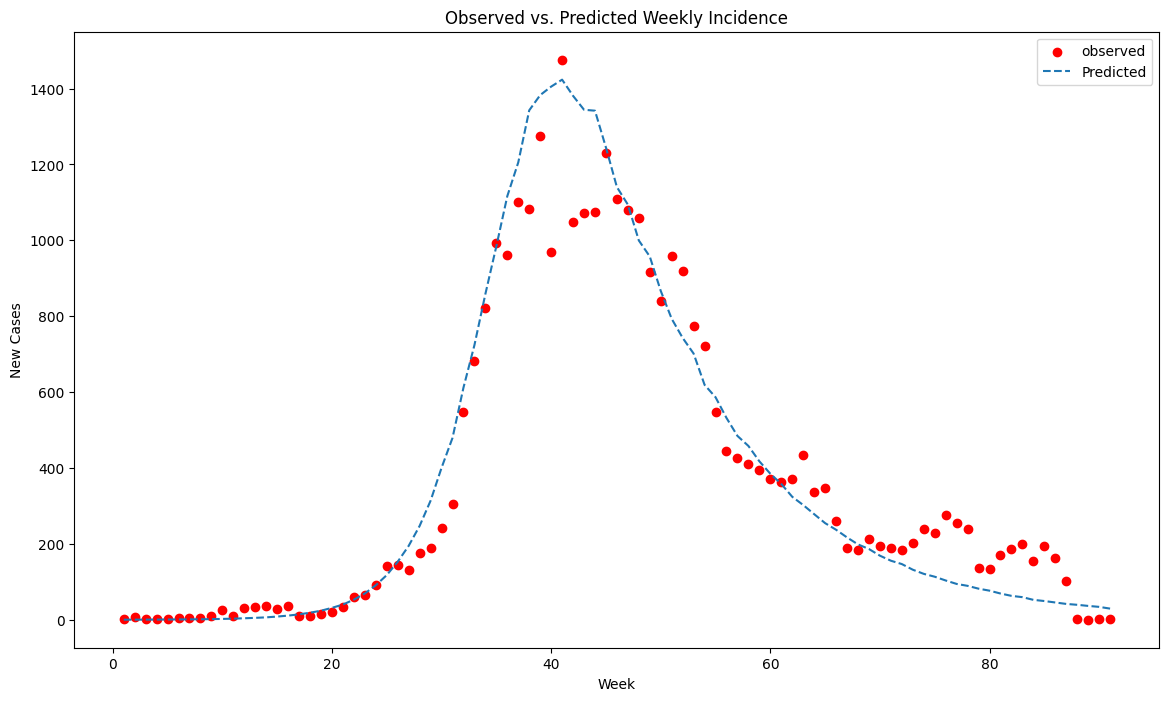

In [ ]:
plt.figure(figsize=(14, 8))
for p in range(1):
    plt.scatter(time, y, label=f"observed",color='red', linestyle="-", marker="o")
    plt.plot(post_pred.index, post_pred['Mean'], label=f"Predicted", linestyle="--")
    # plt.fill_between(x = post_pred.index,  y1 = post_pred['5%'], y2 = post_pred['95%'], alpha=0.2)
plt.title("Observed vs. Predicted Weekly Incidence")
plt.xlabel("Week")
plt.ylabel("New Cases")
plt.legend()
# plt.grid(True)
plt.show()

## Posterior Predictive check

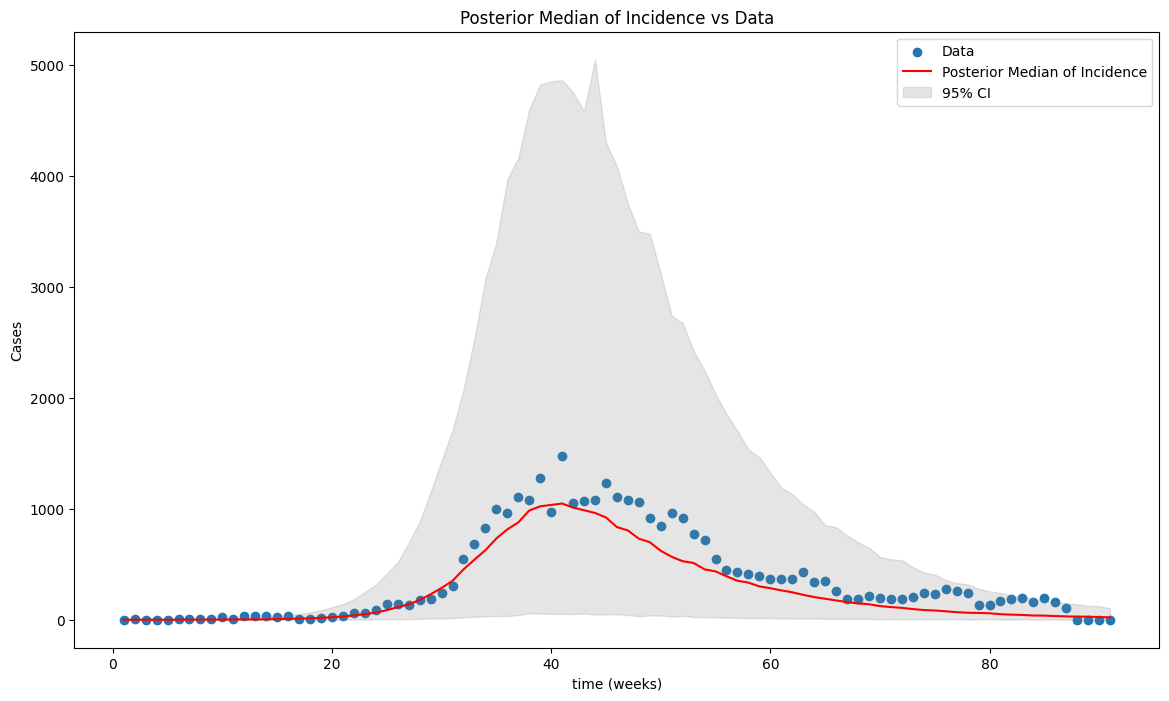

In [ ]:
idata_gp = az.from_cmdstanpy(fit)
custom_summary_fns = {
	'median': lambda x: np.percentile(x, 50),
	'q2.5': lambda x: np.percentile(x, 2.5),
	'q97.5': lambda x: np.percentile(x, 97.5),
}

mu_sum_gp = az.summary(idata_gp, var_names=['predicted_cases'], stat_funcs=custom_summary_fns, extend=False)

# mask = mu_sum_gp.index.str.endswith(', 2]') ## get only the infecetious state
# mu_sum_gp = mu_sum_gp[mask]


def plot_posterior_summary(year, y, posterior_summary):
	fig, ax = plt.subplots(1, 1, figsize=(14, 8))
	ax.scatter(year, y, label='Data',)
	ax.plot(year, posterior_summary['median'], label='Posterior Median of Incidence', color='red')
	ax.fill_between(year, posterior_summary['q2.5'], posterior_summary['q97.5'], color='gray', alpha=0.2, label='95% CI')
	ax.set_title('Posterior Median of Incidence vs Data')
	ax.set_xlabel('time (weeks)')
	ax.set_ylabel('Cases')
	ax.legend()
	plt.show()


# Example usage:
plot_posterior_summary(time, y, mu_sum_gp)

### Plot SEIR Model

In [ ]:
#import posterior
posterior = pd.read_csv('./Data/posterior_samples.csv')
posterior.columns[100:200]

Index(['incidence[86]', 'incidence[87]', 'incidence[88]', 'incidence[89]',
       'incidence[90]', 'incidence[91]', 'phi', 'theta[1]', 'theta[2]',
       'theta[3]', 'y_pred[1,1]', 'y_pred[2,1]', 'y_pred[3,1]', 'y_pred[4,1]',
       'y_pred[5,1]', 'y_pred[6,1]', 'y_pred[7,1]', 'y_pred[8,1]',
       'y_pred[9,1]', 'y_pred[10,1]', 'y_pred[11,1]', 'y_pred[12,1]',
       'y_pred[13,1]', 'y_pred[14,1]', 'y_pred[15,1]', 'y_pred[16,1]',
       'y_pred[17,1]', 'y_pred[18,1]', 'y_pred[19,1]', 'y_pred[20,1]',
       'y_pred[21,1]', 'y_pred[22,1]', 'y_pred[23,1]', 'y_pred[24,1]',
       'y_pred[25,1]', 'y_pred[26,1]', 'y_pred[27,1]', 'y_pred[28,1]',
       'y_pred[29,1]', 'y_pred[30,1]', 'y_pred[31,1]', 'y_pred[32,1]',
       'y_pred[33,1]', 'y_pred[34,1]', 'y_pred[35,1]', 'y_pred[36,1]',
       'y_pred[37,1]', 'y_pred[38,1]', 'y_pred[39,1]', 'y_pred[40,1]',
       'y_pred[41,1]', 'y_pred[42,1]', 'y_pred[43,1]', 'y_pred[44,1]',
       'y_pred[45,1]', 'y_pred[46,1]', 'y_pred[47,1]', 'y_pred[48,1]'

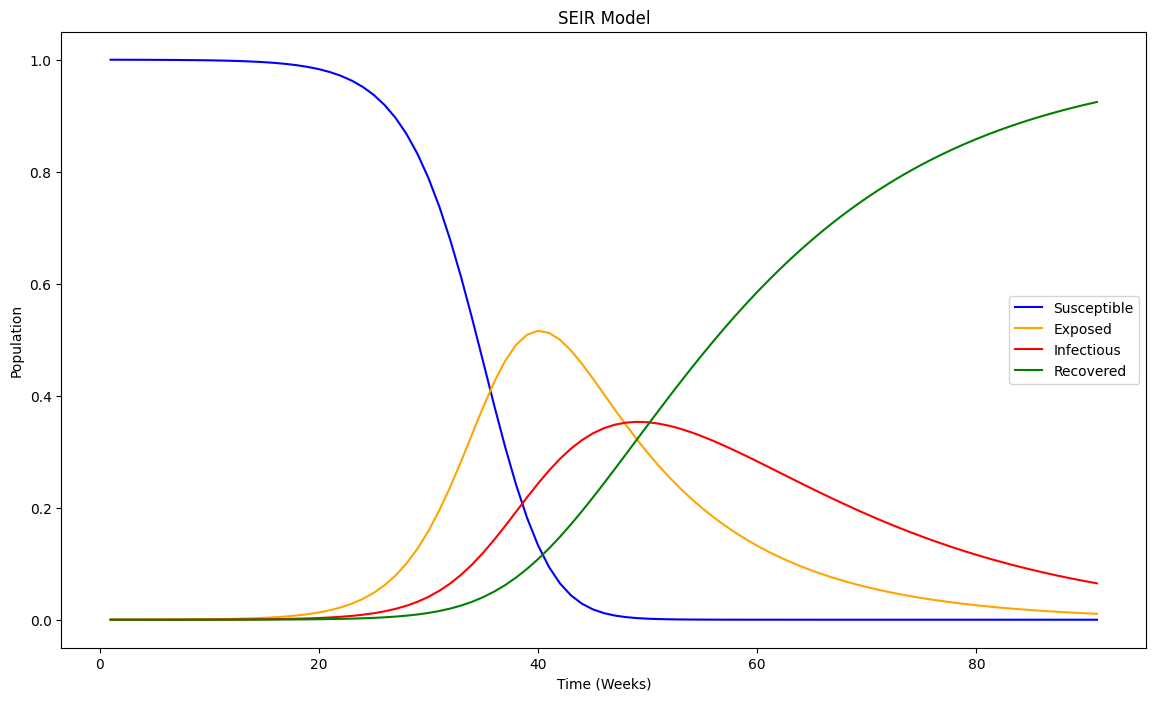

In [ ]:
S_fitted = np.zeros(T)
E_fitted = np.zeros(T)
I_fitted = np.zeros(T)
R_fitted = np.zeros(T)

for t in range(T):
    S_fitted[t] = posterior[f'y_pred[{t+1},1]'].mean()
    E_fitted[t] = posterior[f'y_pred[{t+1},2]'].mean()
    I_fitted[t] = posterior[f'y_pred[{t+1},3]'].mean()
    R_fitted[t] = posterior[f'y_pred[{t+1},4]'].mean()

# Normalize fitted results
S_fitted_frac = S_fitted / N
E_fitted_frac = E_fitted / N
I_fitted_frac = I_fitted / N
R_fitted_frac = R_fitted / N

# --- Step 4: Plot the SEIR trajectories ---
plt.figure(figsize=(14, 8))

# Fitted
plt.plot(time, S_fitted_frac, label='Susceptible', color='blue')
plt.plot(time, E_fitted_frac, label='Exposed', color='orange')
plt.plot(time, I_fitted_frac, label='Infectious', color='red')
plt.plot(time, R_fitted_frac, label='Recovered', color='green')

plt.title('SEIR Model')
plt.xlabel('Time (Weeks)')
plt.ylabel('Population')
plt.legend()
# plt.grid(True)
plt.show()

## 2. Fitting SEIR Patch Model
----------------------------------------------------------------------------------------------------

With this model, each country Guinea, Liberia, and Sierra Leone will be treated as an independent patch, and we’ll fit a separate Susceptible(S), Exposed(E), Infectious(I), and Recovered(R) model to each country’s incidence data. The dynamics for each patch  $p$ (where $ p $ corresponds to the countries) is given below:

$$ \frac{dS_p}{dt} = -\beta_p S_p \frac{I_p}{N_p}$$

$$ \frac{dE_p}{dt} = \beta_p S_p \frac{I_p}{N_p} - \sigma E_p $$

$$\frac{dI_p}{dt} = \sigma E_p - \gamma I_p$$

$$\frac{dR_p}{dt} = \gamma I_p$$

Where:
- $ S_p, E_p, I_p, R_p $: Susceptible, Exposed, Infectious, and Recovered individuals in patch $ p $.
- $ N_p $: Total population for patch $ p $.
- $ \beta_p $: Transmission rate in patch $ p $.
- $ \sigma $: Rate of progression from Exposed to Infectious (inverse of the latent period).
- $ \gamma $: Recovery rate (inverse of the infectious period).

### New Infections
- The rate at which individuals move from the Exposed ($E_p$) to the infectious ($I_p$) compartment at time t is given as:
$$
\sigma E_p(t)
$$

- The number of new infectious individuals at time $ t $ is given by the inflow into the Infectious compartment:
  $$
  \text{New Infectious}(t) = \int_{t-1}^t\sigma E_p(s) ds
  $$
### Observation Model
- We’ll use a Negative Binomial distribution to model the observed incidence data, accounting for overdispersion:
  $$
  I_{\text{obs}}[t, p] \sim \text{NegativeBinomial}(\sigma E_p(t), \phi)
  $$
  where $ \phi $ is the dispersion parameter.

### Initial Conditions and Parameters
- **Initial Conditions**:
  - At $ t = 0 $, assume $ S_p(0) \approx N_p $, $ E_p(0) = I_p(0) = 1 $, $ R_p(0) = 0 $ for each patch, since the outbreak started with a small number of exposed and infectious individuals.
  - $ N_p $: Population sizes for each country (approximate, from **Worldometer** 2014 estimates):
    - Guinea: 11.5 million
    - Liberia: 4.5 million
    - Sierra Leone: 6.8 million

- **Parameters to Estimate**:
  - $ \beta_p $: Transmission rate for each patch.
  - $ \phi $: Dispersion parameter for the Negative Binomial distribution.
  - $ \sigma $: Rate of progression from Exposed to Infectious (fixed at 1/5.3 days, based on Faye et al., 2015).
  - $ \gamma $: Recovery rate (fixed at 1/5 days, based on Faye et al., 2015).

### Discretization
Since the data is weekly, we’ll discretize the ODEs using a daily Euler method and aggregate the new infectious individuals into weekly counts to match `I_obs`.

In [ ]:
# Aggregate cases by country and week
countries = ['Guinea', 'Liberia', 'Sierra Leone']
weekly_cases = ebola.groupby(['Country', pd.Grouper(key='OnsetDate', freq='W')]).size().unstack(fill_value=0).T
weekly_cases = weekly_cases.reindex(columns=countries, fill_value=0)
cases = weekly_cases.values  # Shape: (T, 3)

# Data for Stan
data = {
    'P': 3,
    'T': len(cases),
    't0': 0,
    'ts': np.arange(1, len(cases) + 1),
    'cases': cases,
    # 'N': [11500000, 4500000, 6800000]
    'N': [30000, 500000, 25000],  # Effective population
    'E0': [0, 0, 0],
    'I0': [10, 20, 10]
}

print("Cases shape:", cases.shape)
print("\nFirst few weeks:\n", cases)

NameError: name 'ebola' is not defined

In [ ]:
patchmodel = CmdStanModel(stan_file='multi_patch.stan')

fit_patch_model = patchmodel.sample(data=data,
                        chains=4,
                        iter_sampling=1000
                        , iter_warmup=500,
                        seed=123
                        )

DEBUG:cmdstanpy:Removing /media/brasammy/5B6DAD9B6A1F7E40/Projects/Thesis/Main/Final_work/thesis/multi_patch
13:22:47 - cmdstanpy - INFO - compiling stan file /media/brasammy/5B6DAD9B6A1F7E40/Projects/Thesis/Main/Final_work/thesis/multi_patch.stan to exe file /media/brasammy/5B6DAD9B6A1F7E40/Projects/Thesis/Main/Final_work/thesis/multi_patch
INFO:cmdstanpy:compiling stan file /media/brasammy/5B6DAD9B6A1F7E40/Projects/Thesis/Main/Final_work/thesis/multi_patch.stan to exe file /media/brasammy/5B6DAD9B6A1F7E40/Projects/Thesis/Main/Final_work/thesis/multi_patch
DEBUG:cmdstanpy:cmd: make STANCFLAGS+=--filename-in-msg=multi_patch.stan /media/brasammy/5B6DAD9B6A1F7E40/Projects/Thesis/Main/Final_work/thesis/multi_patch
cwd: /home/brasammy/.cmdstan/cmdstan-2.36.0
DEBUG:cmdstanpy:Console output:

--- Translating Stan model to C++ code ---
bin/stanc --filename-in-msg=multi_patch.stan --o=/media/brasammy/5B6DAD9B6A1F7E40/Projects/Thesis/Main/Final_work/thesis/multi_patch.hpp /media/brasammy/5B6DAD


13:33:47 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/media/brasammy/5B6DAD9B6A1F7E40/Projects/Thesis/Main/Final_work/thesis/multi_patch', 'id=1', 'random', 'seed=123', 'data', 'file=/tmp/tmpw0u1dcbn/k170rdy1.json', 'output', 'file=/tmp/tmpw0u1dcbn/multi_patch9mvypqk5/multi_patch-20250428132316_1.csv', 'method=sample', 'num_samples=1000', 'num_warmup=500', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpw0u1dcbn/multi_patch9mvypqk5/multi_patch-20250428132316_1.csv
 console_msgs (if any):
	/tmp/tmpw0u1dcbn/multi_patch9mvypqk5/multi_patch-20250428132316_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 1000 (Default)
    num_warmup = 500
    save_warmup = false (Default)
    thin = 1 (Default)
    adapt
      engaged =

In [ ]:
print(fit_patch_model.diagnose())

DEBUG:cmdstanpy:cmd: /home/brasammy/.cmdstan/cmdstan-2.36.0/bin/diagnose /tmp/tmpw0u1dcbn/multi_patch9mvypqk5/multi_patch-20250428132316_1.csv /tmp/tmpw0u1dcbn/multi_patch9mvypqk5/multi_patch-20250428132316_2.csv /tmp/tmpw0u1dcbn/multi_patch9mvypqk5/multi_patch-20250428132316_3.csv /tmp/tmpw0u1dcbn/multi_patch9mvypqk5/multi_patch-20250428132316_4.csv
cwd: None


Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Rank-normalized split effective sample size satisfactory for all parameters.

Rank-normalized split R-hat values satisfactory for all parameters.

Processing complete, no problems detected.



In [ ]:
fit_patch_model.summary()

DEBUG:cmdstanpy:cmd: /home/brasammy/.cmdstan/cmdstan-2.36.0/bin/stansummary --percentiles= 5,50,95 --sig_figs=6 --csv_filename=/tmp/tmpw0u1dcbn/stansummary-multi_patch-7kzk9frv.csv /tmp/tmpw0u1dcbn/multi_patch9mvypqk5/multi_patch-20250428132316_1.csv /tmp/tmpw0u1dcbn/multi_patch9mvypqk5/multi_patch-20250428132316_2.csv /tmp/tmpw0u1dcbn/multi_patch9mvypqk5/multi_patch-20250428132316_3.csv /tmp/tmpw0u1dcbn/multi_patch9mvypqk5/multi_patch-20250428132316_4.csv
cwd: None


Mean      MCSE     StdDev        MAD  \
lp__                  -1232.800000  0.068014   2.744820   2.698330   
sigma                     0.404557  0.000850   0.042915   0.041881   
gamma                     0.077921  0.000285   0.013171   0.012730   
beta[1]                   0.311045  0.000603   0.025132   0.025270   
beta[2]                   0.734553  0.001252   0.056665   0.058717   
...                            ...       ...        ...        ...   
predicted_cases[91,2]     0.015000       NaN   0.123608   0.000000   
predicted_cases[91,3]    25.269500  0.351578  22.494600  16.308600   
predicted_cases[92,1]     2.635250  0.047643   2.832620   2.965200   
predicted_cases[92,2]     0.016000       NaN   0.125491   0.000000   
predicted_cases[92,3]    22.788300  0.315170  20.013600  16.308600   

                                5%          50%          95%  ESS_bulk  \
lp__                  -1237.790000 -1232.460000 -1228.860000   1590.34   
sigma                     0.340834     0.401262     0.477548   2626.79   
gamma                     0.058346     0.076973     0.101129   2140.34   
beta[1]                   0.271057     0.310231     0.354730   1752.36   
beta[2]                   0.645837     0.731808     0.830435   2078.24   
...                            ...          ...          ...       ...   
predicted_cases[91,2]     0.000000     0.000000     0.000000   4132.39   
predicted_cases[91,3]     2.000000    19.000000    67.000000   4002.75   
predicted_cases[92,1]     0.000000     2.000000     8.000000   3645.21   
predicted_cases[92,2]     0.000000     0.000000     0.000000       NaN   
predicted_cases[92,3]     2.000000    18.000000    62.000000   4048.54   

                       ESS_tail     R_hat  
lp__                    2602.58  1.000760  
sigma                   2673.98  1.002020  
gamma                   2812.20  0.999838  
beta[1]                 1941.44  1.001240  
beta[2]                 2282.32  1.000330  
...                         ...       ...  
predicted_cases[91,2]   2000.00  0.999648  
predicted_cases[91,3]   3949.71  0.999651  
predicted_cases[92,1]   3365.03  0.999950  
predicted_cases[92,2]       NaN       NaN  
predicted_cases[92,3]   3538.19  1.000230  

[592 rows x 10 columns]

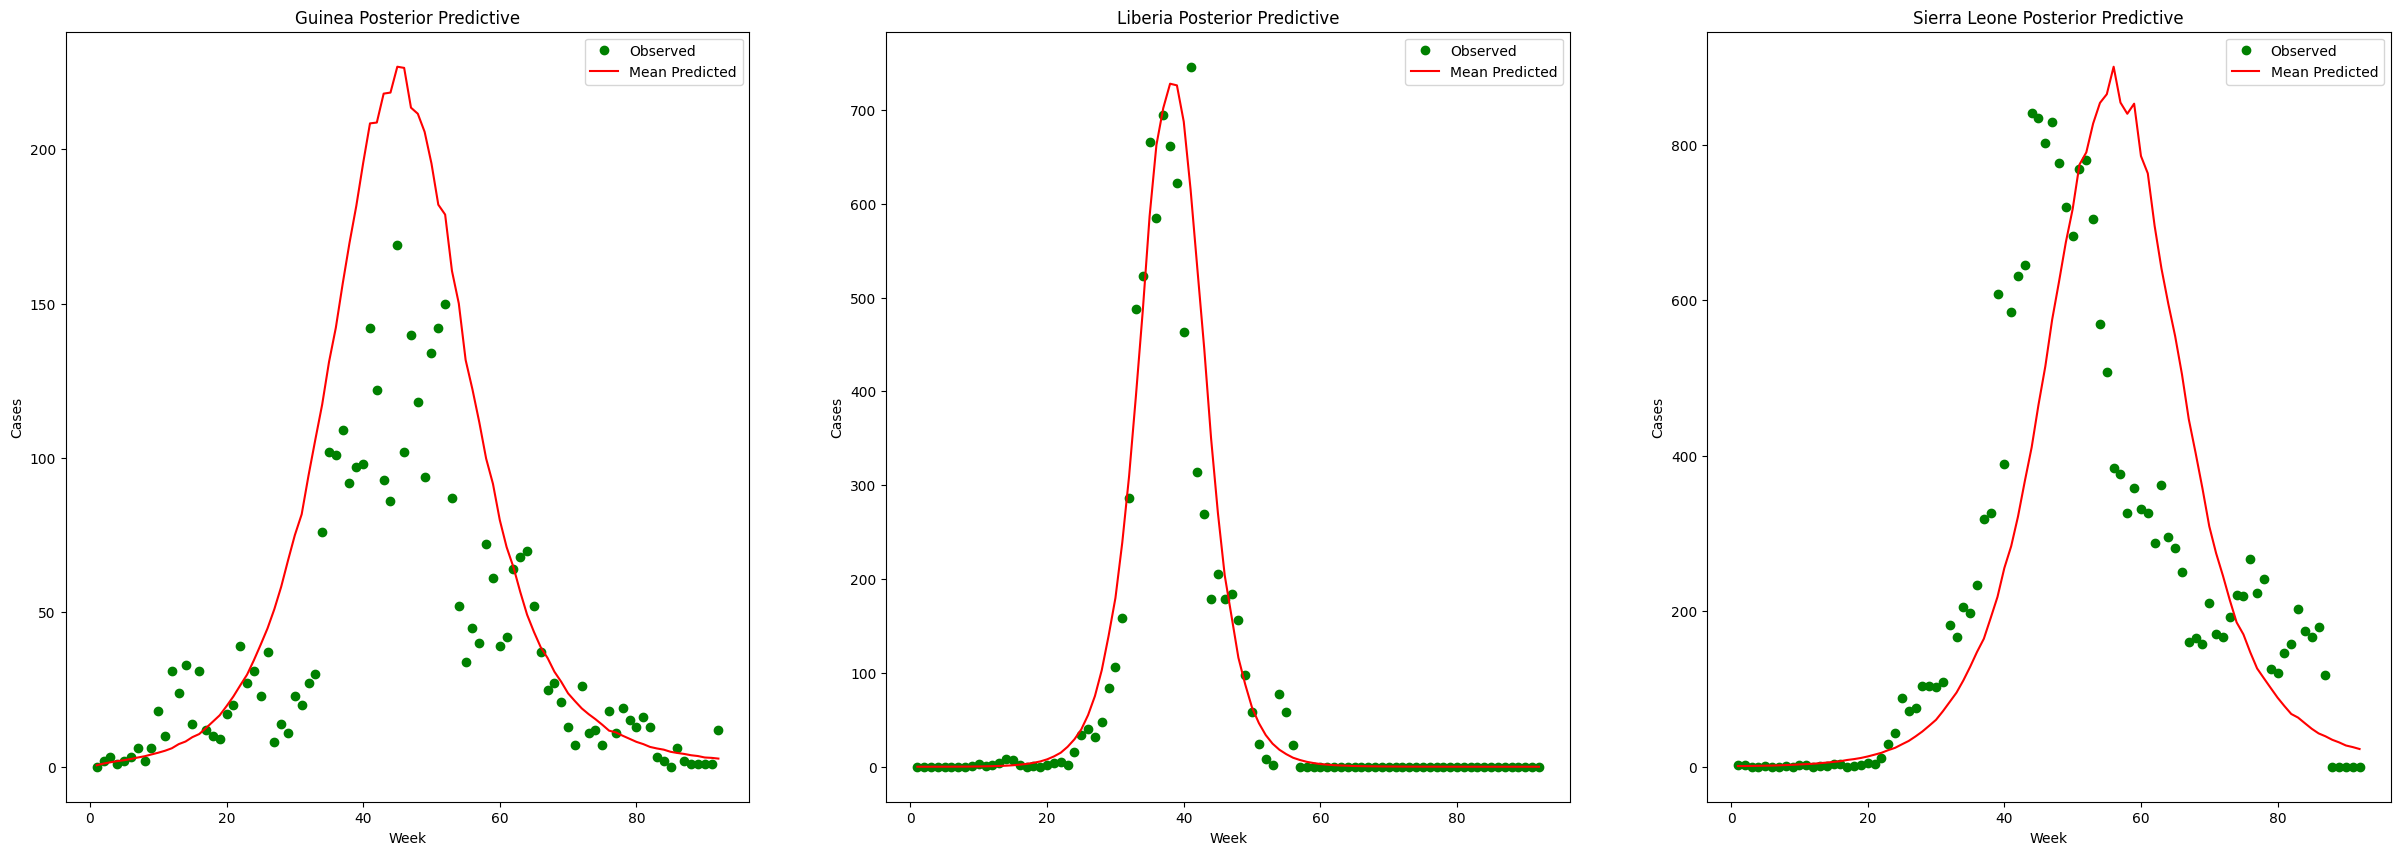

In [ ]:
import matplotlib.pyplot as plt
predicted_cases = fit_patch_model.stan_variable('predicted_cases')  # Shape: (samples, T, P)

## subplot (1,3)
fig, axes = plt.subplots(1, 3, figsize=(30, 10))
for p, country in enumerate(countries):
    # for i in range(400):
    #     plt.plot(data['ts'], predicted_cases[i, :, p], alpha=0.1, color='blue')
    axes[p].plot(data['ts'], data['cases'][:, p], 'o', label='Observed', color='green')
    axes[p].plot(data['ts'], predicted_cases.mean(axis=0)[:, p], label='Mean Predicted', color='red')
    axes[p].set_title(f'{country} Posterior Predictive')
    axes[p].set_xlabel('Week')
    axes[p].set_ylabel('Cases')
    axes[p].legend()
plt.show()

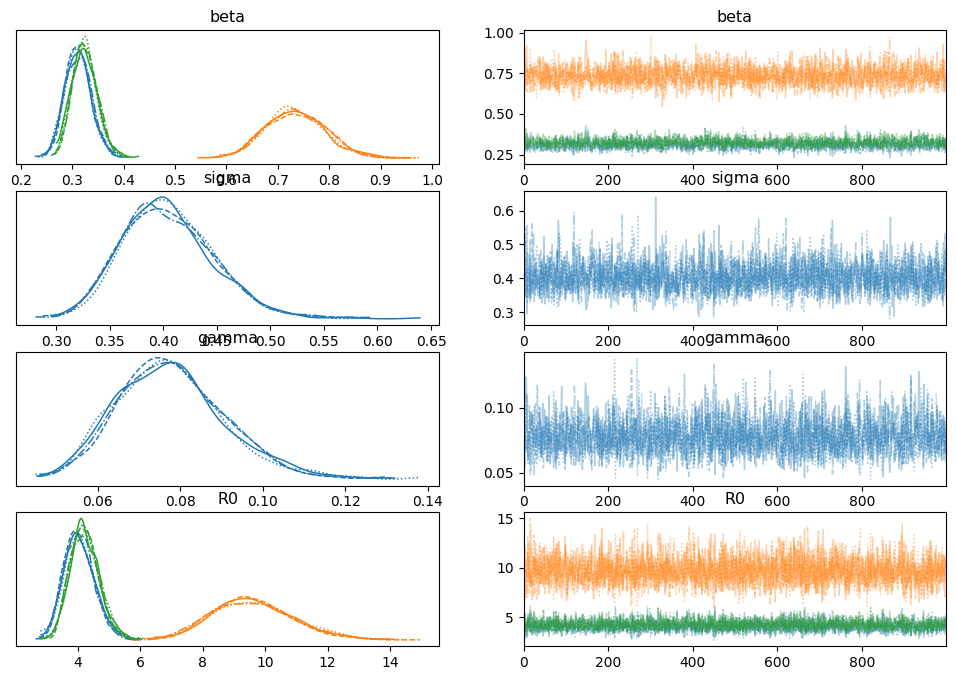

In [ ]:
## trace plots
az.plot_trace(fit_patch_model, var_names=["beta", "sigma", "gamma", "R0"])
plt.show()

In [ ]:
posterior_patch = fit_patch_model.draws_pd()
post = posterior_patch.filter(like="predicted_cases")
post = post.rename(columns=lambda x: x.replace('predicted_cases[', '').replace(']', ''))
post = post.rename(columns={'1': 'Guinea', '2': 'Liberia', '3': 'Sierra Leone'})
post = post.melt(var_name='Country', value_name='Predicted Cases')
post.tail(10)

Country  Predicted Cases
1103990    92,3             34.0
1103991    92,3             25.0
1103992    92,3             13.0
1103993    92,3              8.0
1103994    92,3             17.0
1103995    92,3              4.0
1103996    92,3             12.0
1103997    92,3             27.0
1103998    92,3             32.0
1103999    92,3             18.0

In [ ]:

# S = np.zeros(T)
# E = np.zeros(T)
# I = np.zeros(T)
# R = np.zeros(T)


# fig, axes = plt.subplots(1, 3, figsize=(30, 10))
# for p, country in enumerate(countries):
#     for t in range(T):
#         S[t] = posterior_patch[f'y_pred[{t+1},1]'].mean()
#         E[t] = posterior_patch[f'y_pred[{t+1},2]'].mean()
#         I[t] = posterior_patch[f'y_pred[{t+1},3]'].mean()
#         R[t] = posterior_patch[f'y_pred[{t+1},4]'].mean()

#     # Normalize fitted results
#     S_frac = S / N
#     E_frac = E / N
#     I_frac = I / N
#     R_frac = R / N

#     # Fitted
#     axes[p].plot(time, S_frac, label='Susceptible', color='blue')
#     axes[p].plot(time, E_frac, label='Exposed', color='orange')
#     axes[p].plot(time, I_frac, label='Infectious', color='red')
#     axes[p].plot(time, R_frac, label='Recovered', color='green')

#     plt.title('SEIR Model')
#     plt.xlabel('Time (Weeks)')
#     plt.ylabel('Population')
#     plt.legend()
#     # plt.grid(True)
# plt.show()

In [49]:
# Aggregate cases by country and week
countries = ['Guinea', 'Liberia', 'Sierra Leone']
weekly_cases = ebola.groupby(['Country', pd.Grouper(key='OnsetDate', freq='W')]).size().unstack(fill_value=0).T
weekly_cases = weekly_cases.reindex(columns=countries, fill_value=0)
cases = weekly_cases.values  # Shape: (T, 3)

# Data for Stan
datamain = {
    'P': 3,
    'T': len(cases),
    't0': 0,
    'ts': np.arange(1, len(cases) + 1),
    'cases': cases,
    # 'N': [11500000, 4500000, 6800000],
    'N': [30000, 500000, 25000],  # Effective population
    'E0': [0, 0, 0],
    'I0': [1, 1, 4]
}

print("Cases shape:", cases.shape)
print("\nFirst few weeks:\n", cases[:10])

Cases shape: (92, 3)

First few weeks:
 [[ 0  0  2]
 [ 2  0  2]
 [ 3  0  0]
 [ 1  0  0]
 [ 2  0  1]
 [ 3  0  0]
 [ 6  0  0]
 [ 2  0  1]
 [ 6  1  0]
 [18  3  2]]


In [51]:
# Compile and fit the model
model_patch = CmdStanModel(stan_file="coupling.stan")
fitpatch = model_patch.sample(
    data=datamain,
    chains=4,
    iter_warmup= 500,
    iter_sampling=1000,
    seed=12
)
# Convert to ArviZ InferenceData for analysis
inference_data = az.from_cmdstanpy(fitpatch)

DEBUG:cmdstanpy:Removing /media/brasammy/5B6DAD9B6A1F7E40/Projects/Thesis/Main/Final_work/thesis/coupling
12:52:57 - cmdstanpy - INFO - compiling stan file /media/brasammy/5B6DAD9B6A1F7E40/Projects/Thesis/Main/Final_work/thesis/coupling.stan to exe file /media/brasammy/5B6DAD9B6A1F7E40/Projects/Thesis/Main/Final_work/thesis/coupling
INFO:cmdstanpy:compiling stan file /media/brasammy/5B6DAD9B6A1F7E40/Projects/Thesis/Main/Final_work/thesis/coupling.stan to exe file /media/brasammy/5B6DAD9B6A1F7E40/Projects/Thesis/Main/Final_work/thesis/coupling
DEBUG:cmdstanpy:cmd: make STANCFLAGS+=--filename-in-msg=coupling.stan /media/brasammy/5B6DAD9B6A1F7E40/Projects/Thesis/Main/Final_work/thesis/coupling
cwd: /home/brasammy/.cmdstan/cmdstan-2.36.0
DEBUG:cmdstanpy:Console output:

--- Translating Stan model to C++ code ---
bin/stanc --filename-in-msg=coupling.stan --o=/media/brasammy/5B6DAD9B6A1F7E40/Projects/Thesis/Main/Final_work/thesis/coupling.hpp /media/brasammy/5B6DAD9B6A1F7E40/Projects/Thesis/


00:07:28 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/media/brasammy/5B6DAD9B6A1F7E40/Projects/Thesis/Main/Final_work/thesis/coupling', 'id=1', 'random', 'seed=12', 'data', 'file=/tmp/tmpsnjqv6sx/0b_6gjyz.json', 'output', 'file=/tmp/tmpsnjqv6sx/couplingmdv9dkyu/coupling-20250513125327_1.csv', 'method=sample', 'num_samples=1000', 'num_warmup=500', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpsnjqv6sx/couplingmdv9dkyu/coupling-20250513125327_1.csv
 console_msgs (if any):
	/tmp/tmpsnjqv6sx/couplingmdv9dkyu/coupling-20250513125327_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 1000 (Default)
    num_warmup = 500
    save_warmup = false (Default)
    thin = 1 (Default)
    adapt
      engaged = true (Default)
      

00:07:32 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 301 divergent transitions (30.1%)
	Chain 2 had 2 divergent transitions (0.2%)
	Chain 3 had 51 divergent transitions (5.1%)
	Chain 4 had 397 divergent transitions (39.7%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
	Chain 1 had 301 divergent transitions (30.1%)
	Chain 2 had 2 divergent transitions (0.2%)
	Chain 3 had 51 divergent transitions (5.1%)
	Chain 4 had 397 divergent transitions (39.7%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


In [52]:
print(fitpatch.diagnose())

DEBUG:cmdstanpy:cmd: /home/brasammy/.cmdstan/cmdstan-2.36.0/bin/diagnose /tmp/tmpsnjqv6sx/couplingmdv9dkyu/coupling-20250513125327_1.csv /tmp/tmpsnjqv6sx/couplingmdv9dkyu/coupling-20250513125327_2.csv /tmp/tmpsnjqv6sx/couplingmdv9dkyu/coupling-20250513125327_3.csv /tmp/tmpsnjqv6sx/couplingmdv9dkyu/coupling-20250513125327_4.csv
cwd: None


Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
751 of 1000 (75.10%) transitions ended with a divergence.
These divergent transitions indicate that HMC is not fully able to explore the posterior distribution.
Try increasing adapt delta closer to 1.
If this doesn't remove all divergences, try to reparameterize the model.

Checking E-BFMI - sampler transitions HMC potential energy.
The E-BFMI, 0.14, is below the nominal threshold of 0.30 which suggests that HMC may have trouble exploring the target distribution.
If possible, try to reparameterize the model.

Rank-normalized split effective sample size satisfactory for all parameters.

The following parameters had rank-normalized split R-hat greater than 1.01:
  sigma, gamma, mu, beta[1], beta[2], beta[3], mobility[1,1], mobility[2,1], mobility[3,1], mobility[1,2], mobility[2,2], mobility[3,2], mobility[1,3], mobility[2,3], mobility[3,3], phi_inv, rho[1], r

In [53]:
fitpatch.summary()

DEBUG:cmdstanpy:cmd: /home/brasammy/.cmdstan/cmdstan-2.36.0/bin/stansummary --percentiles= 5,50,95 --sig_figs=6 --csv_filename=/tmp/tmpsnjqv6sx/stansummary-coupling-_b14g9mq.csv /tmp/tmpsnjqv6sx/couplingmdv9dkyu/coupling-20250513125327_1.csv /tmp/tmpsnjqv6sx/couplingmdv9dkyu/coupling-20250513125327_2.csv /tmp/tmpsnjqv6sx/couplingmdv9dkyu/coupling-20250513125327_3.csv /tmp/tmpsnjqv6sx/couplingmdv9dkyu/coupling-20250513125327_4.csv
cwd: None


Mean      MCSE     StdDev       MAD           5%  \
lp__     -1325.990000  6.288190  11.610300  6.049010 -1346.800000   
sigma        0.095559  0.005398   0.012675  0.013910     0.077108   
gamma        0.136800  0.006514   0.050500  0.041386     0.073134   
mu           0.111960  0.001117   0.021888  0.021467     0.079260   
beta[1]      0.357999  0.024182   0.068332  0.070927     0.242795   
...               ...       ...        ...       ...          ...   
Rt[91,2]     0.000066  0.000023   0.000079  0.000043     0.000001   
Rt[91,3]     0.014271  0.006320   0.018770  0.011456     0.000078   
Rt[92,1]     0.014483  0.005857   0.014004  0.013952     0.000119   
Rt[92,2]     0.000063  0.000022   0.000075  0.000041     0.000001   
Rt[92,3]     0.014416  0.006388   0.018943  0.011637     0.000078   

                  50%          95%   ESS_bulk   ESS_tail    R_hat  
lp__     -1320.410000 -1314.320000    9.99547  2000.0000  1.33098  
sigma        0.094891     0.118370    8.55454  2000.0000  1.39068  
gamma        0.126667     0.224652   67.46550   402.2870  1.04927  
mu           0.110731     0.151927  421.39100   333.6790  1.02112  
beta[1]      0.359520     0.467976   12.74450   361.0620  1.22153  
...               ...          ...        ...        ...      ...  
Rt[91,2]     0.000043     0.000215   12.20650    38.7596  1.24165  
Rt[91,3]     0.008858     0.049751    8.15218  2000.0000  1.43071  
Rt[92,1]     0.012215     0.042990    7.89405  2000.0000  1.45041  
Rt[92,2]     0.000042     0.000207   12.43680    38.7596  1.23592  
Rt[92,3]     0.008984     0.050224    8.14883  2000.0000  1.43104  

[2523 rows x 10 columns]

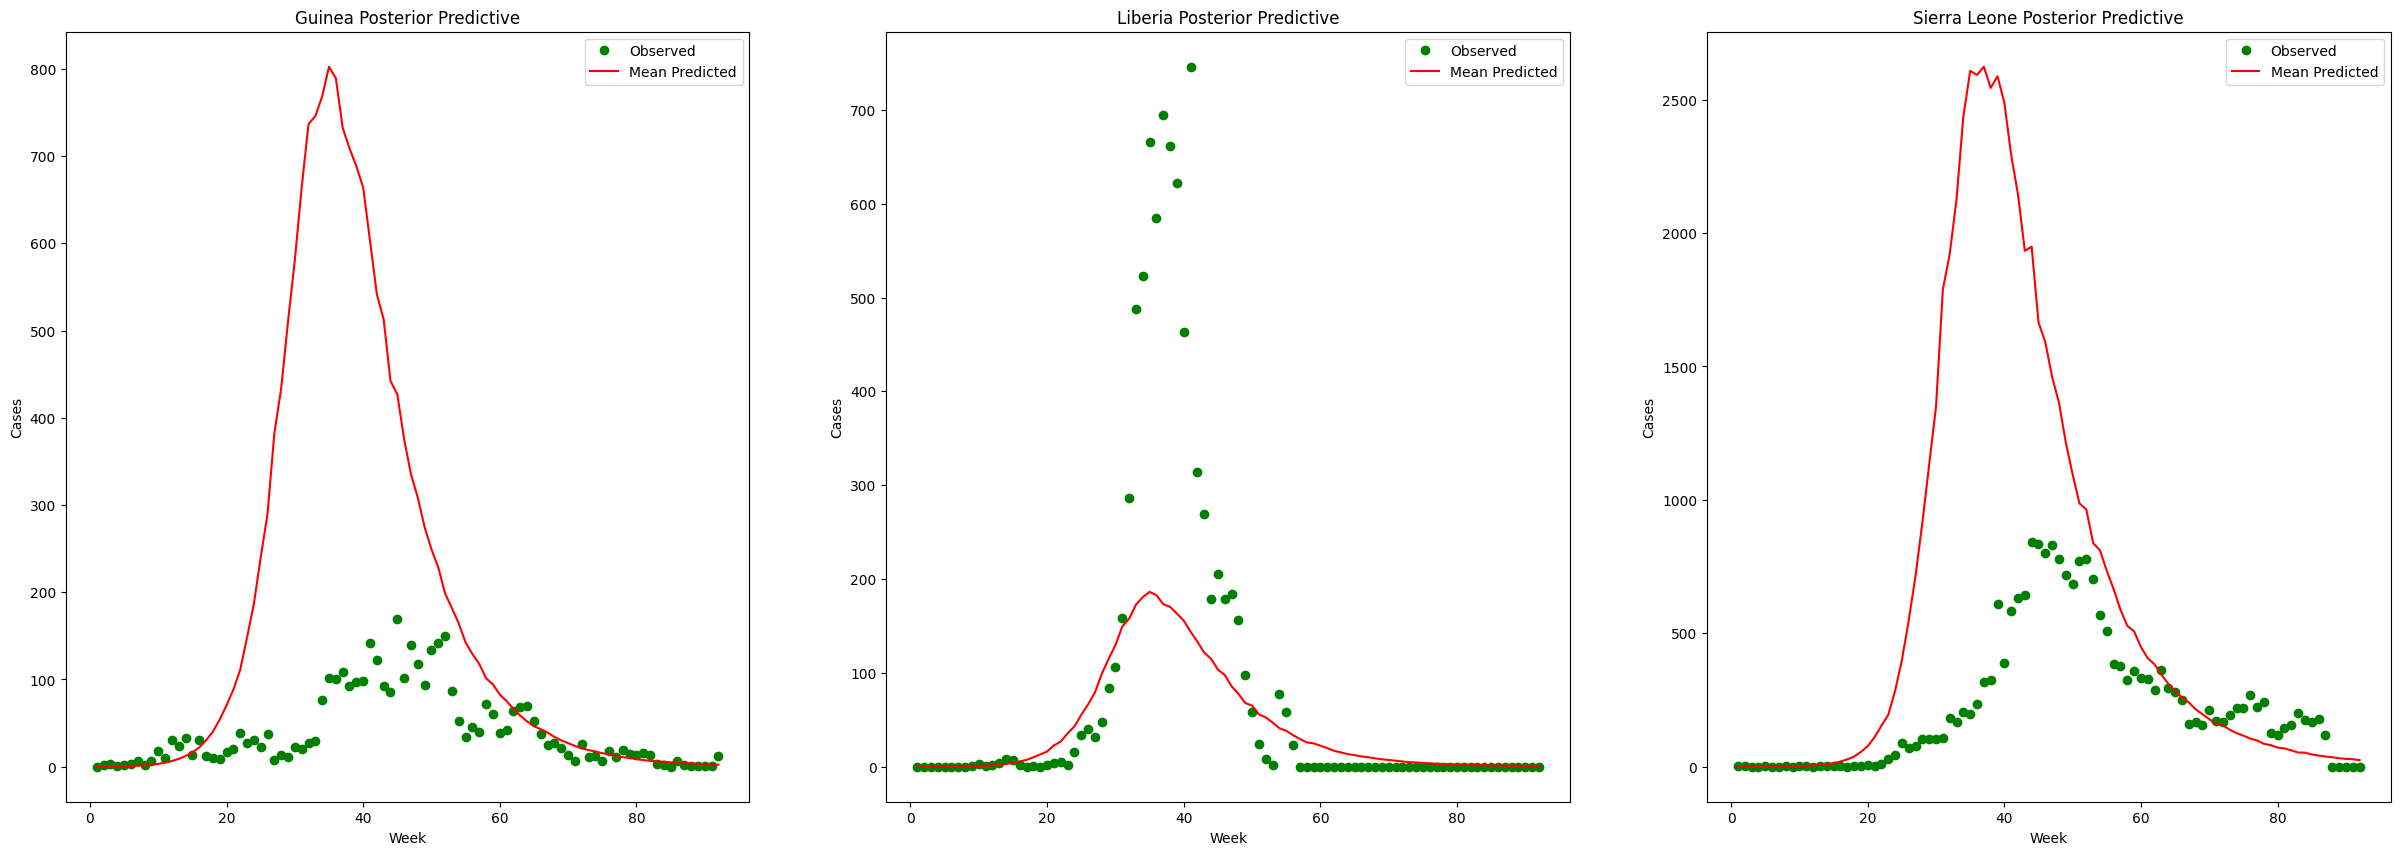

In [55]:
import matplotlib.pyplot as plt
predicted_cases = fitpatch.stan_variable('predicted_cases')  # Shape: (samples, T, P)

## subplot (1,3)
fig, axes = plt.subplots(1, 3, figsize=(30, 10))
for p, country in enumerate(countries):
    # for i in range(400):
    #     plt.plot(data['ts'], predicted_cases[i, :, p], alpha=0.1, color='blue')
    axes[p].plot(datamain['ts'], datamain['cases'][:, p], 'o', label='Observed', color='green')
    axes[p].plot(datamain['ts'], predicted_cases.mean(axis=0)[:, p], label='Mean Predicted', color='red')
    axes[p].set_title(f'{country} Posterior Predictive')
    axes[p].set_xlabel('Week')
    axes[p].set_ylabel('Cases')
    axes[p].legend()
plt.show()

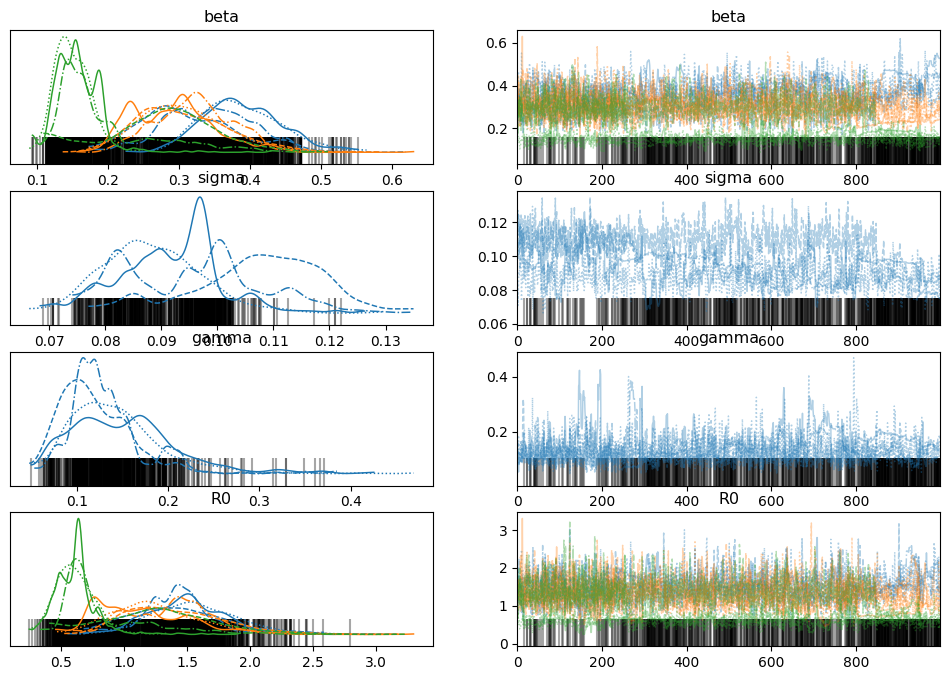

In [56]:
## trace plots
az.plot_trace(fitpatch, var_names=["beta", "sigma", "gamma", "R0"])
plt.show()

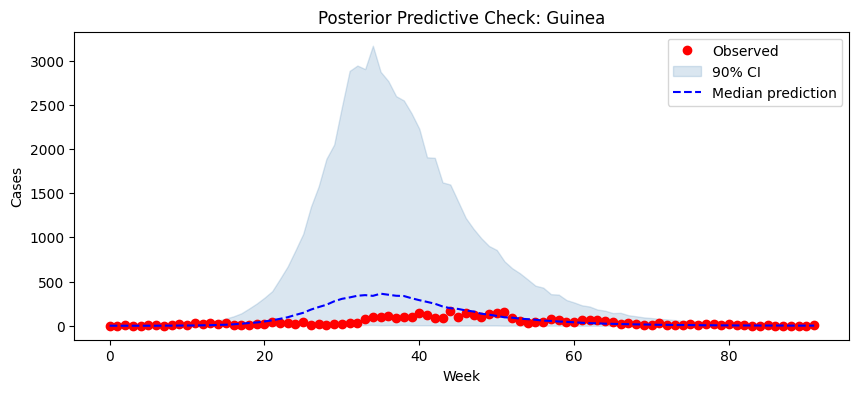

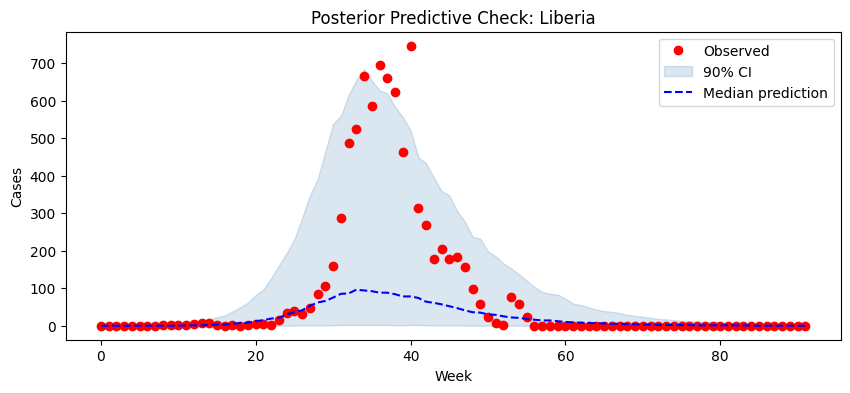

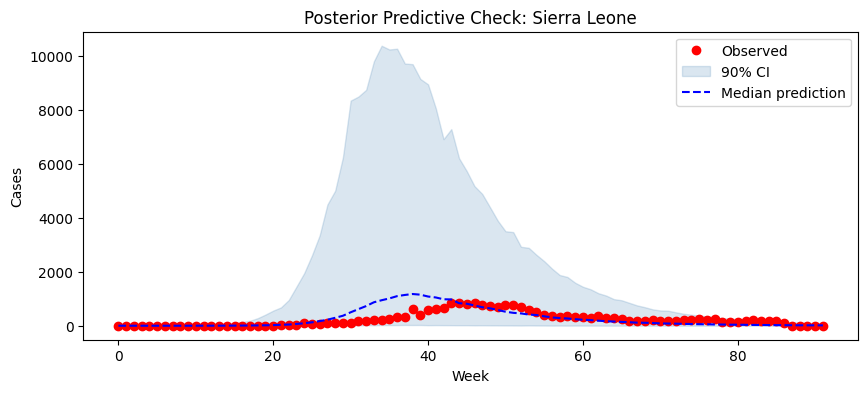


Coverage probabilities (90% CI):
Guinea: 93.48%
Liberia: 95.65%
Sierra Leone: 95.65%


In [58]:
# Extract posterior predictive samples
predicted = fitpatch.stan_variable("predicted_cases")  # shape: (chains * draws, T, P)

# --- Visualization ---
def plot_posterior_predictive(observed, predicted, country_idx, country_name):
    fig, ax = plt.subplots(figsize=(10, 4))

    # Observed data
    ax.plot(observed[:, country_idx], 'o', label="Observed", color='red')

    # Posterior predictive (90% CI)
    lower = np.percentile(predicted[:, :, country_idx], 5, axis=0)
    upper = np.percentile(predicted[:, :, country_idx], 95, axis=0)
    ax.fill_between(range(len(observed)), lower, upper, color='steelblue', alpha=0.2, label="90% CI")

    # Median prediction
    median = np.median(predicted[:, :, country_idx], axis=0)
    ax.plot(median, 'b--', label="Median prediction")

    ax.set_title(f"Posterior Predictive Check: {country_name}")
    ax.set_xlabel("Week")
    ax.set_ylabel("Cases")
    ax.legend()
    plt.show()

# Plot for each country
countries = ["Guinea", "Liberia", "Sierra Leone"]
for i, name in enumerate(countries):
    plot_posterior_predictive(cases, predicted, i, name)

# --- Quantitative Checks ---
def coverage_probability(observed, predicted, ci=0.9):
    # Ensure ci is a fraction
    if ci > 1:
        ci /= 100
    lower = np.percentile(predicted, (1-ci)/2*100, axis=0)
    upper = np.percentile(predicted, (1+ci)/2*100, axis=0)
    covered = (observed >= lower) & (observed <= upper)
    return np.mean(covered)

print("\nCoverage probabilities (90% CI):")
for i, name in enumerate(countries):
    cov = coverage_probability(cases[:, i], predicted[:, :, i])
    print(f"{name}: {cov:.2%}")

In [59]:
# Get available variables
print("Available variables:", fitpatch.stan_variables().keys())

Available variables: dict_keys(['sigma', 'gamma', 'mu', 'beta', 'mobility', 'phi_inv', 'rho', 'incidence', 'phi', 'theta', 'y_pred', 'R0', 'predicted_cases', 'Rt'])


Available variables: dict_keys(['sigma', 'gamma', 'mu', 'beta', 'mobility', 'phi_inv', 'rho', 'incidence', 'phi', 'theta', 'y_pred', 'R0', 'predicted_cases', 'Rt'])


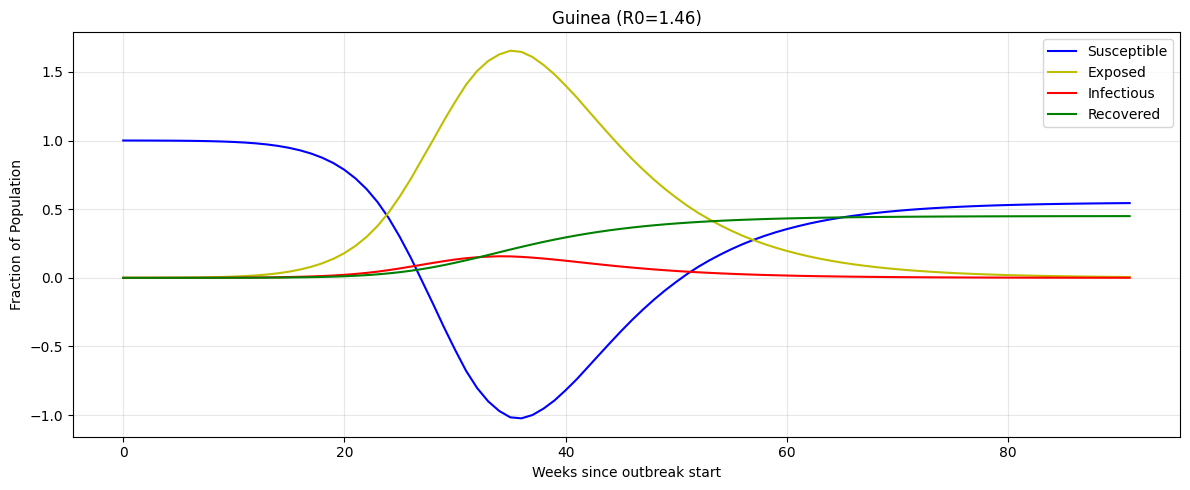

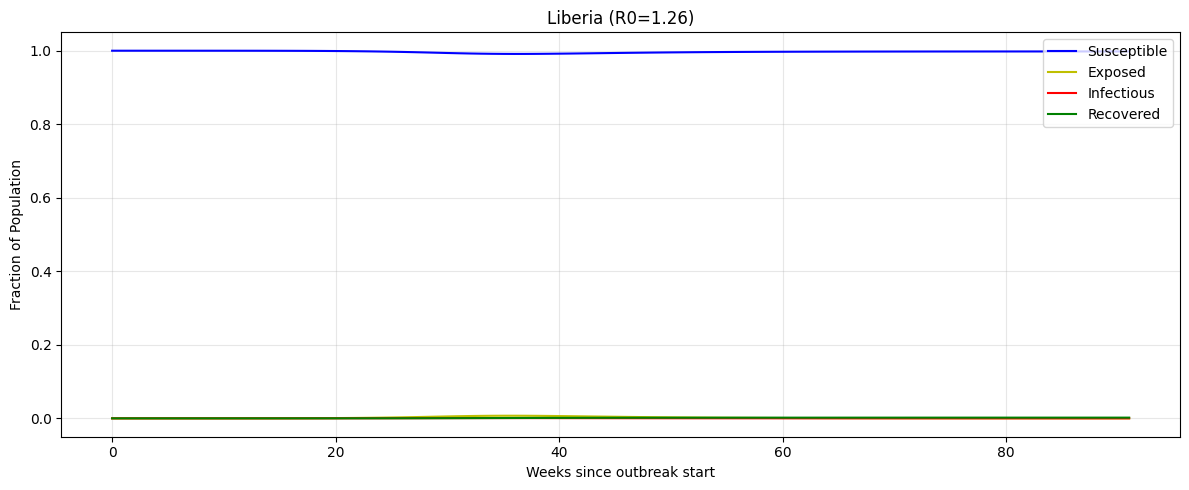

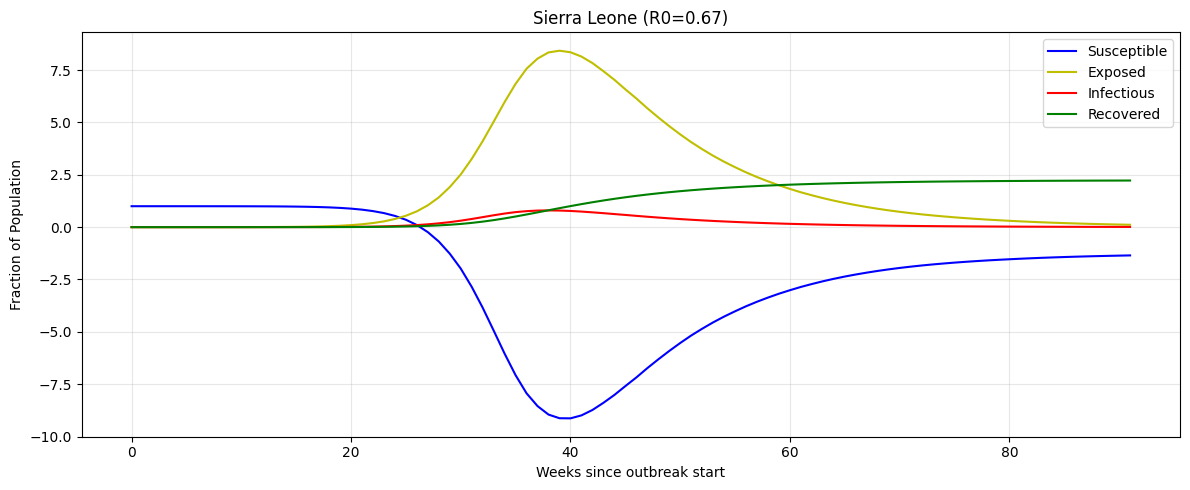

In [61]:
# Get available variables
print("Available variables:", fitpatch.stan_variables().keys())

# Time points and countries
weeks = np.arange(fitpatch.stan_variable('incidence').shape[1])  # Number of weeks
countries = ['Guinea', 'Liberia', 'Sierra Leone']


# Plot incidence (infectious) and reconstructed other compartments
for i, country in enumerate(countries):

    # Create figure
    fig, axes = plt.subplots(1, 1, figsize=(12, 5), sharex=True)
        # Get median incidence
    incidence = np.median(fitpatch.stan_variable('incidence')[:, :, i], axis=0)

    # Reconstruct approximate compartments (scaled by reporting rate)
    rho = np.median(fitpatch.stan_variable('rho')[:, i])
    I = incidence / rho
    R = np.cumsum(I) * np.median(fitpatch.stan_variable('gamma'))
    E = np.roll(I, 1) / np.median(fitpatch.stan_variable('sigma'))  # Exposed ~ delayed infectious
    E[0] = 0
    S = datamain['N'][i] - E - I - R

    # Convert to fractions
    S_frac = S / datamain['N'][i]
    E_frac = E / datamain['N'][i]
    I_frac = I / datamain['N'][i]
    R_frac = R / datamain['N'][i]

    # Plot
    plt.plot(weeks, S_frac, 'b', label='Susceptible')
    plt.plot(weeks, E_frac, 'y', label='Exposed')
    plt.plot(weeks, I_frac, 'r', label='Infectious')
    plt.plot(weeks, R_frac, 'g', label='Recovered')

    # Formatting
    plt.title(f'{country} (R0={np.median(fitpatch.stan_variable("R0")[:, i]):.2f})')
    plt.ylabel('Fraction of Population')
    plt.grid(True, alpha=0.3)
    # ax.set_ylim(0, 1)

    plt.legend(loc='upper right')

    plt.xlabel('Weeks since outbreak start')
    plt.tight_layout()
    plt.show()